In [1]:
from IPython.core.display import HTML
HTML(""""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

pd.options.display.max_columns = 100

%matplotlib inline

In [2]:
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

In [3]:
titanic = pd.read_csv("./Datasets/Titanic/train.csv")
titanic.shape

(891, 12)

In [4]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# median is more robust to outliners!
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())

In [7]:
titanic["Died"] = 1 - titanic["Survived"]

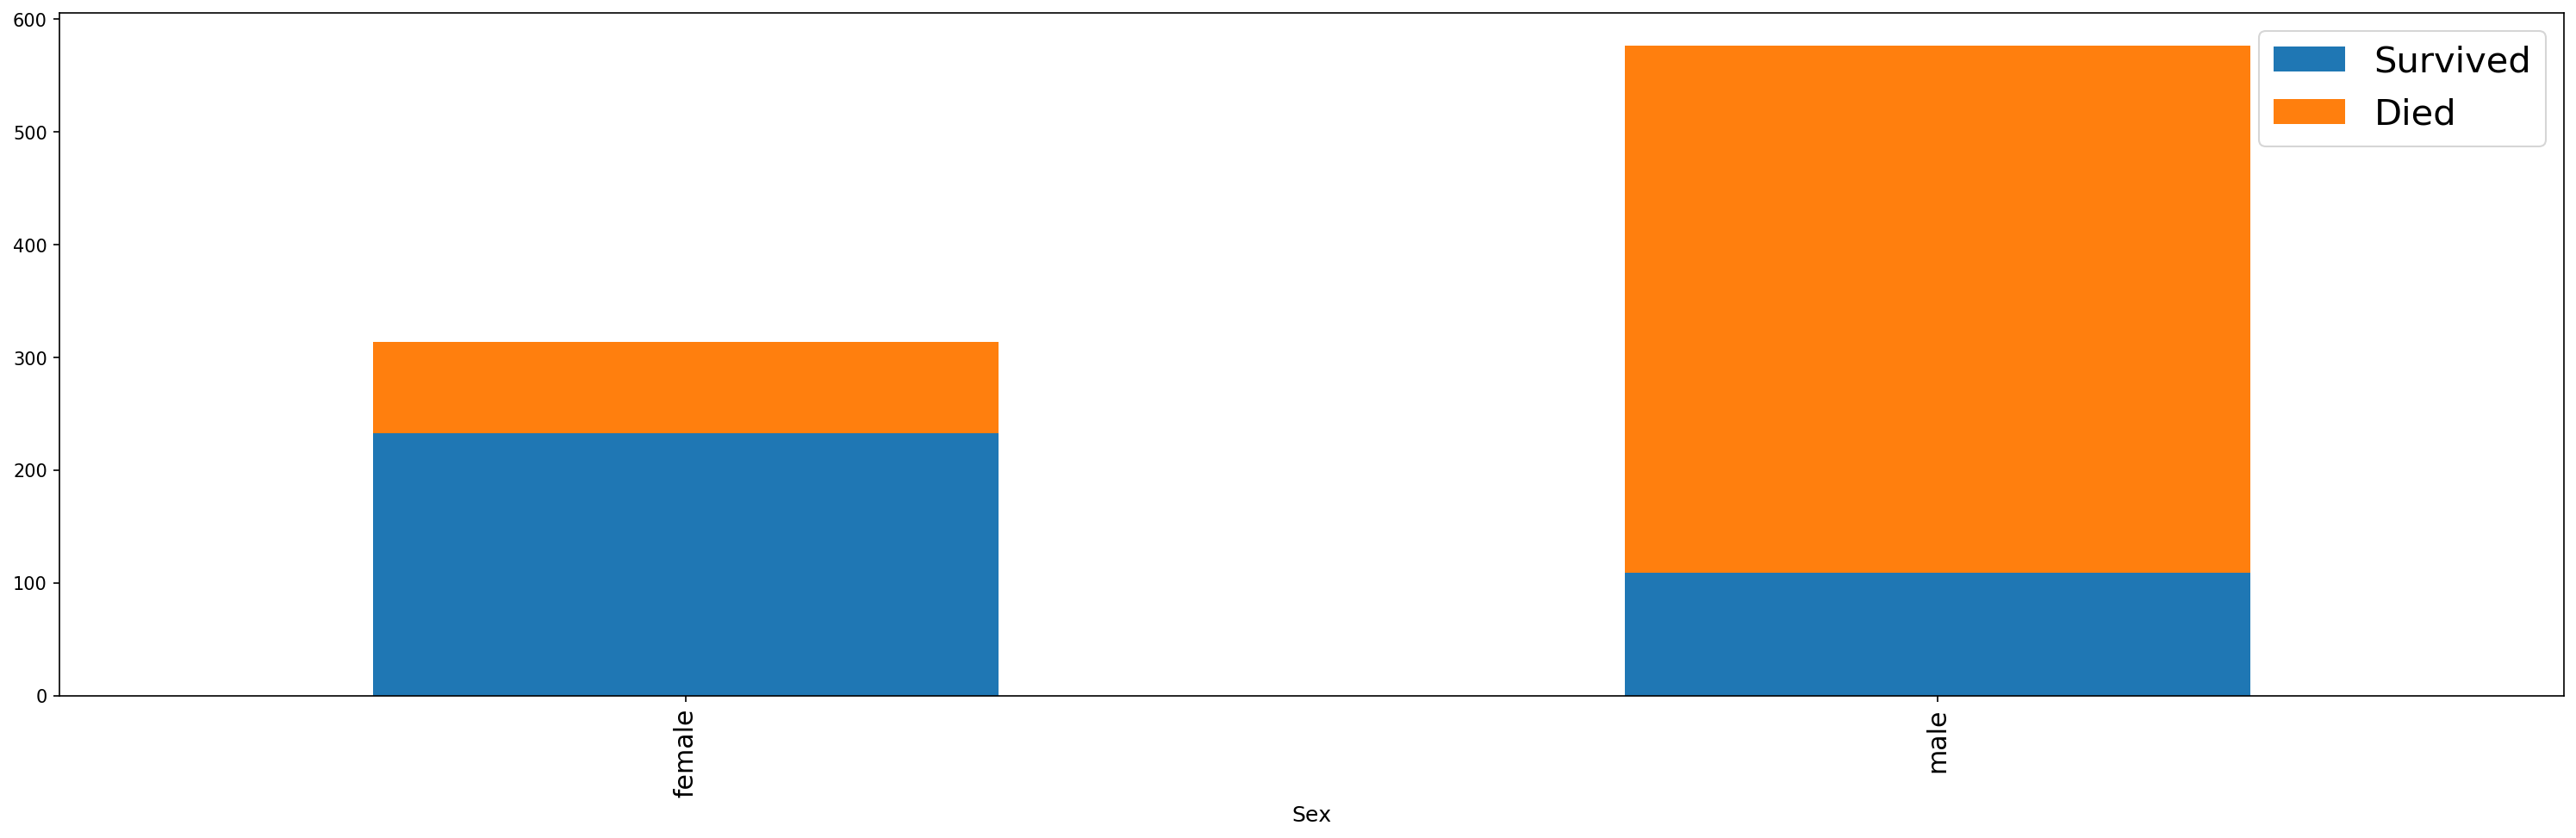

In [8]:
titanic.groupby("Sex").agg("sum")[["Survived" , "Died"]].plot(kind="bar" , figsize = (25,7) , stacked=True)

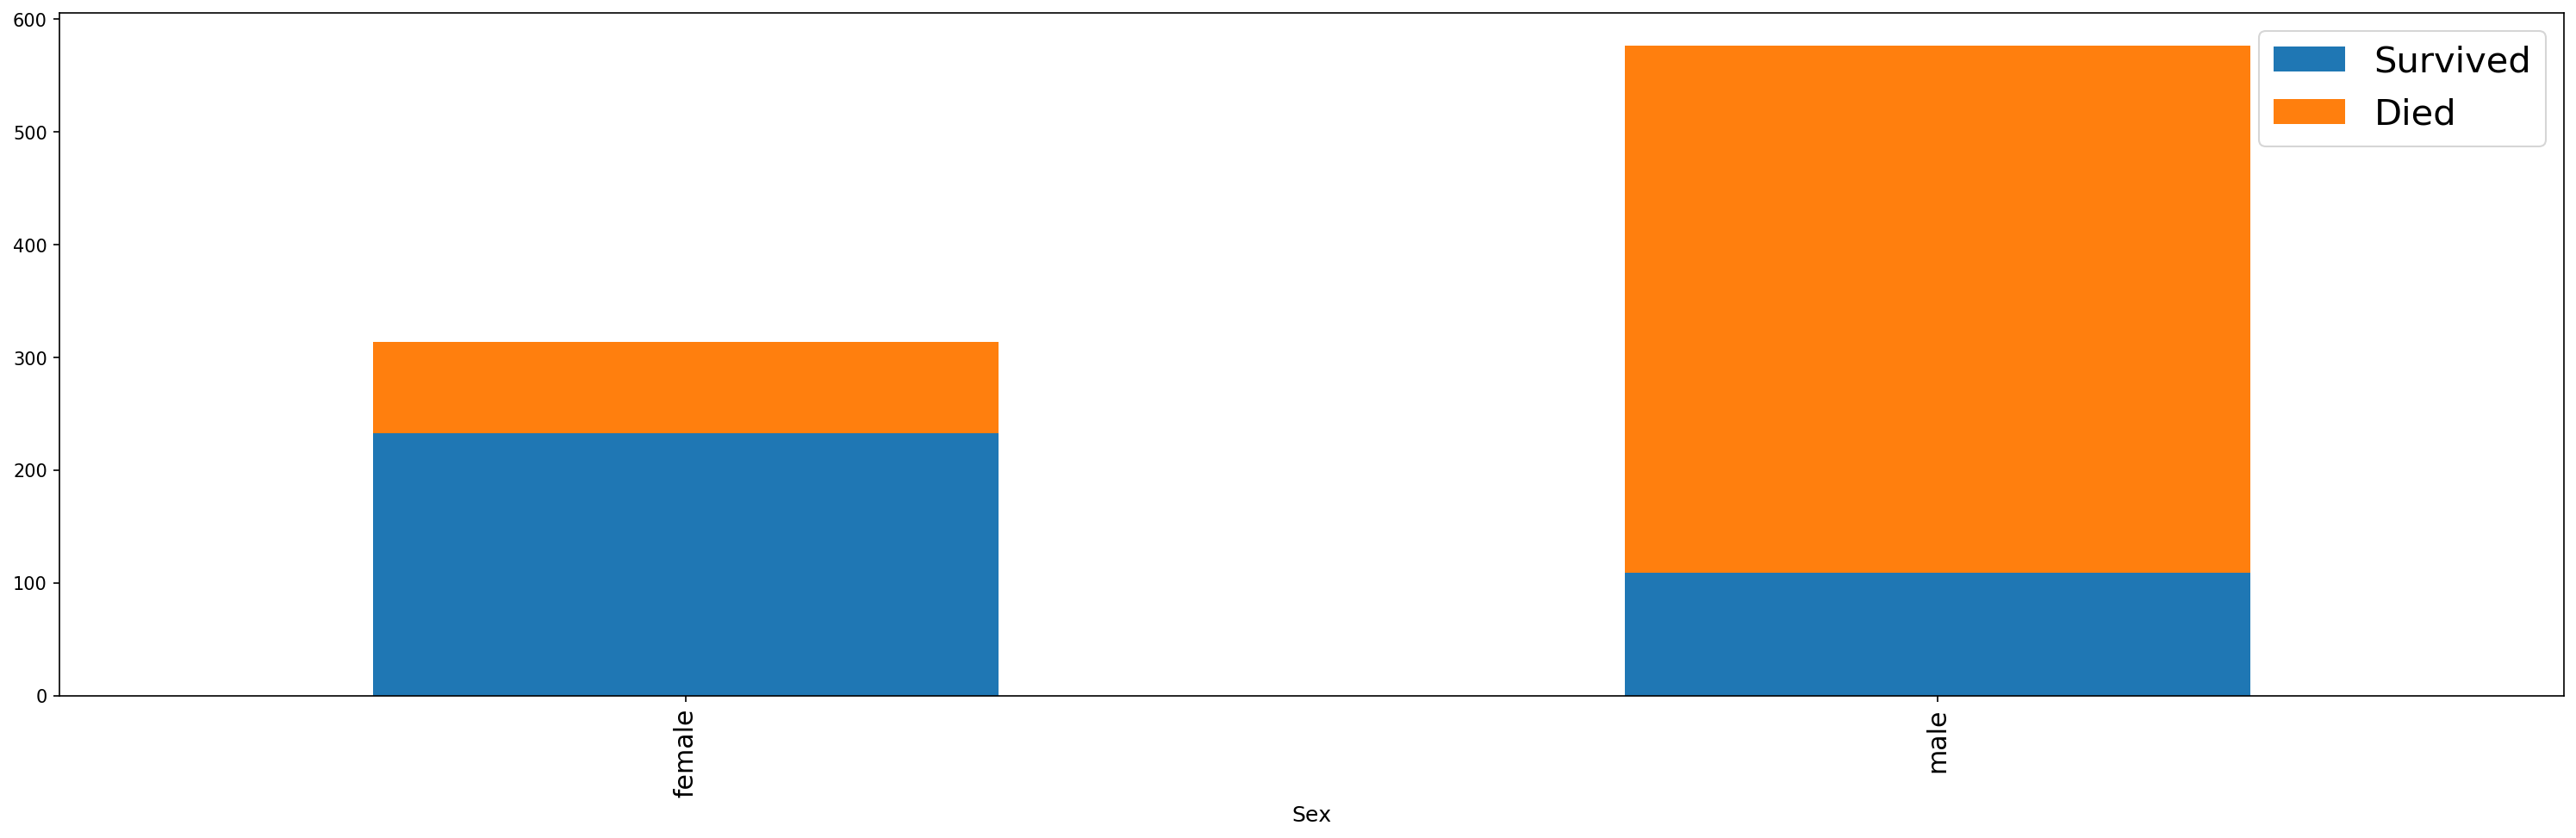

In [9]:
titanic.groupby('Sex').sum()[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7) , stacked=True)

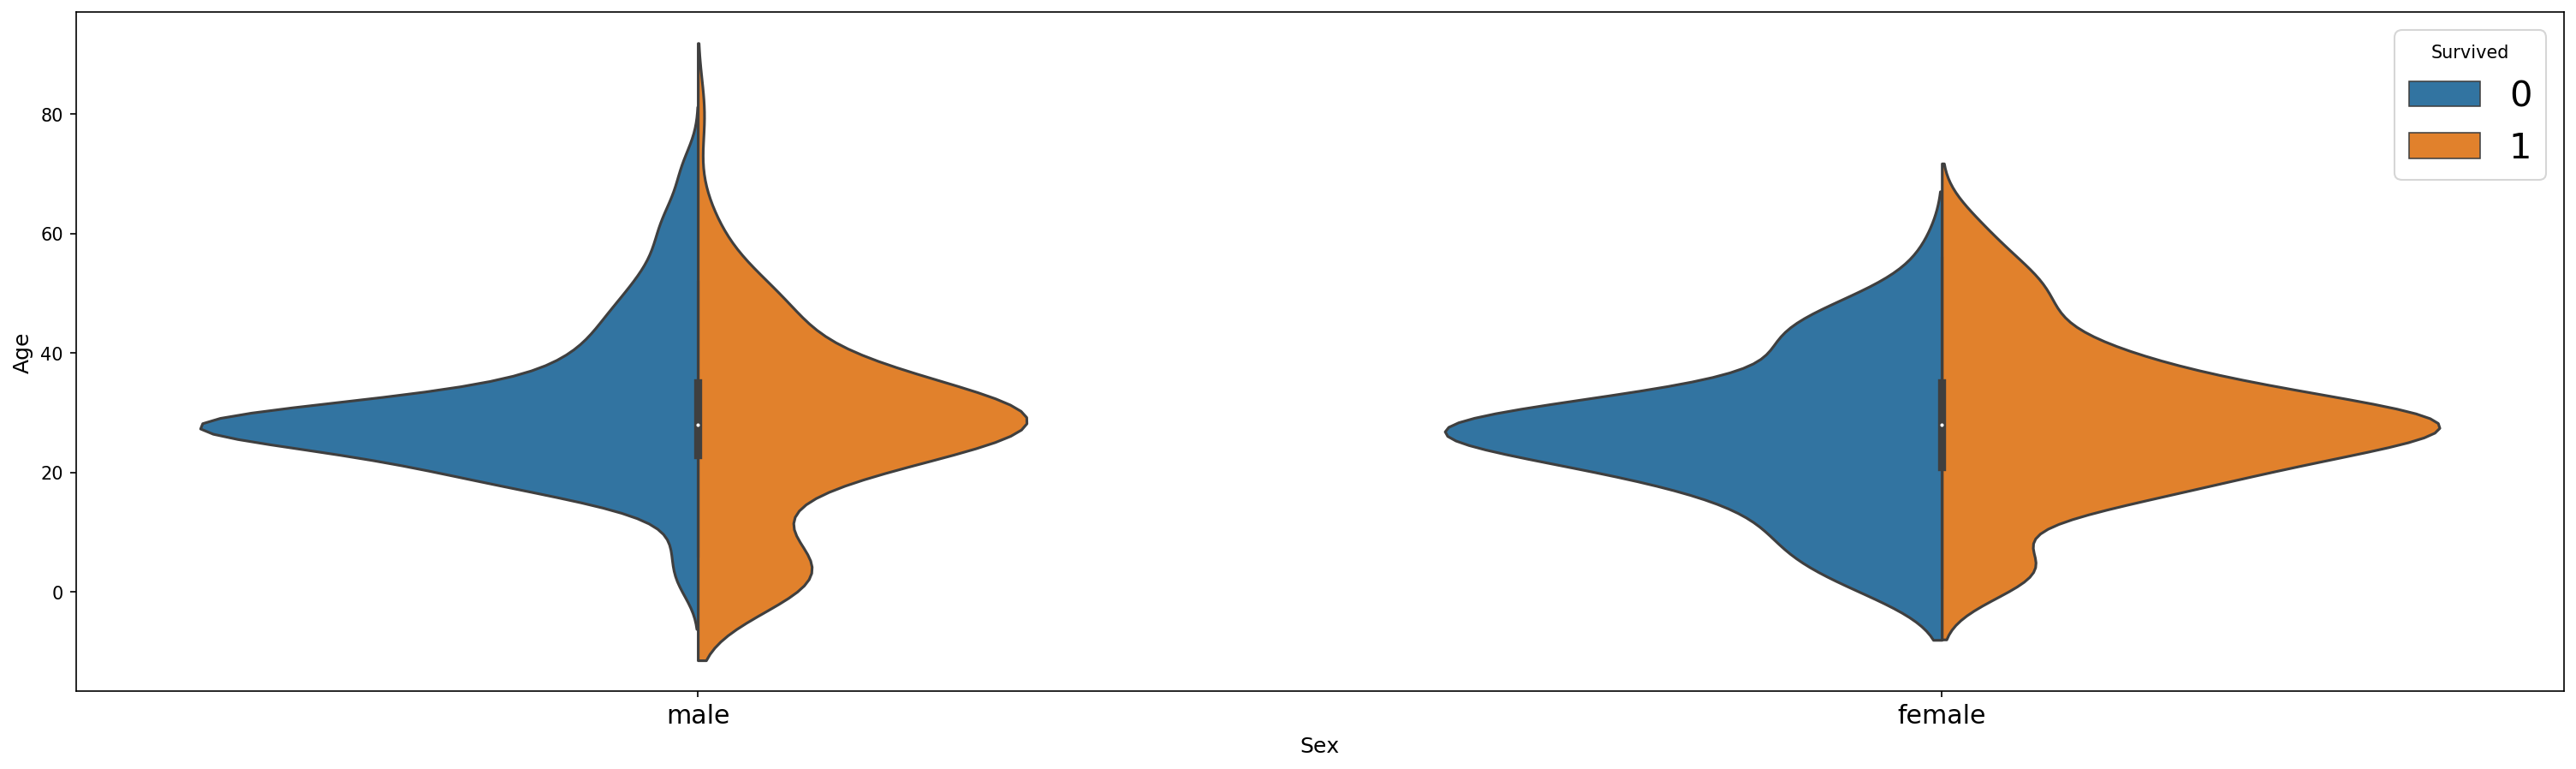

In [10]:
sns.violinplot(x = "Sex" , y = "Age" , hue = "Survived" , data = titanic , split=True)

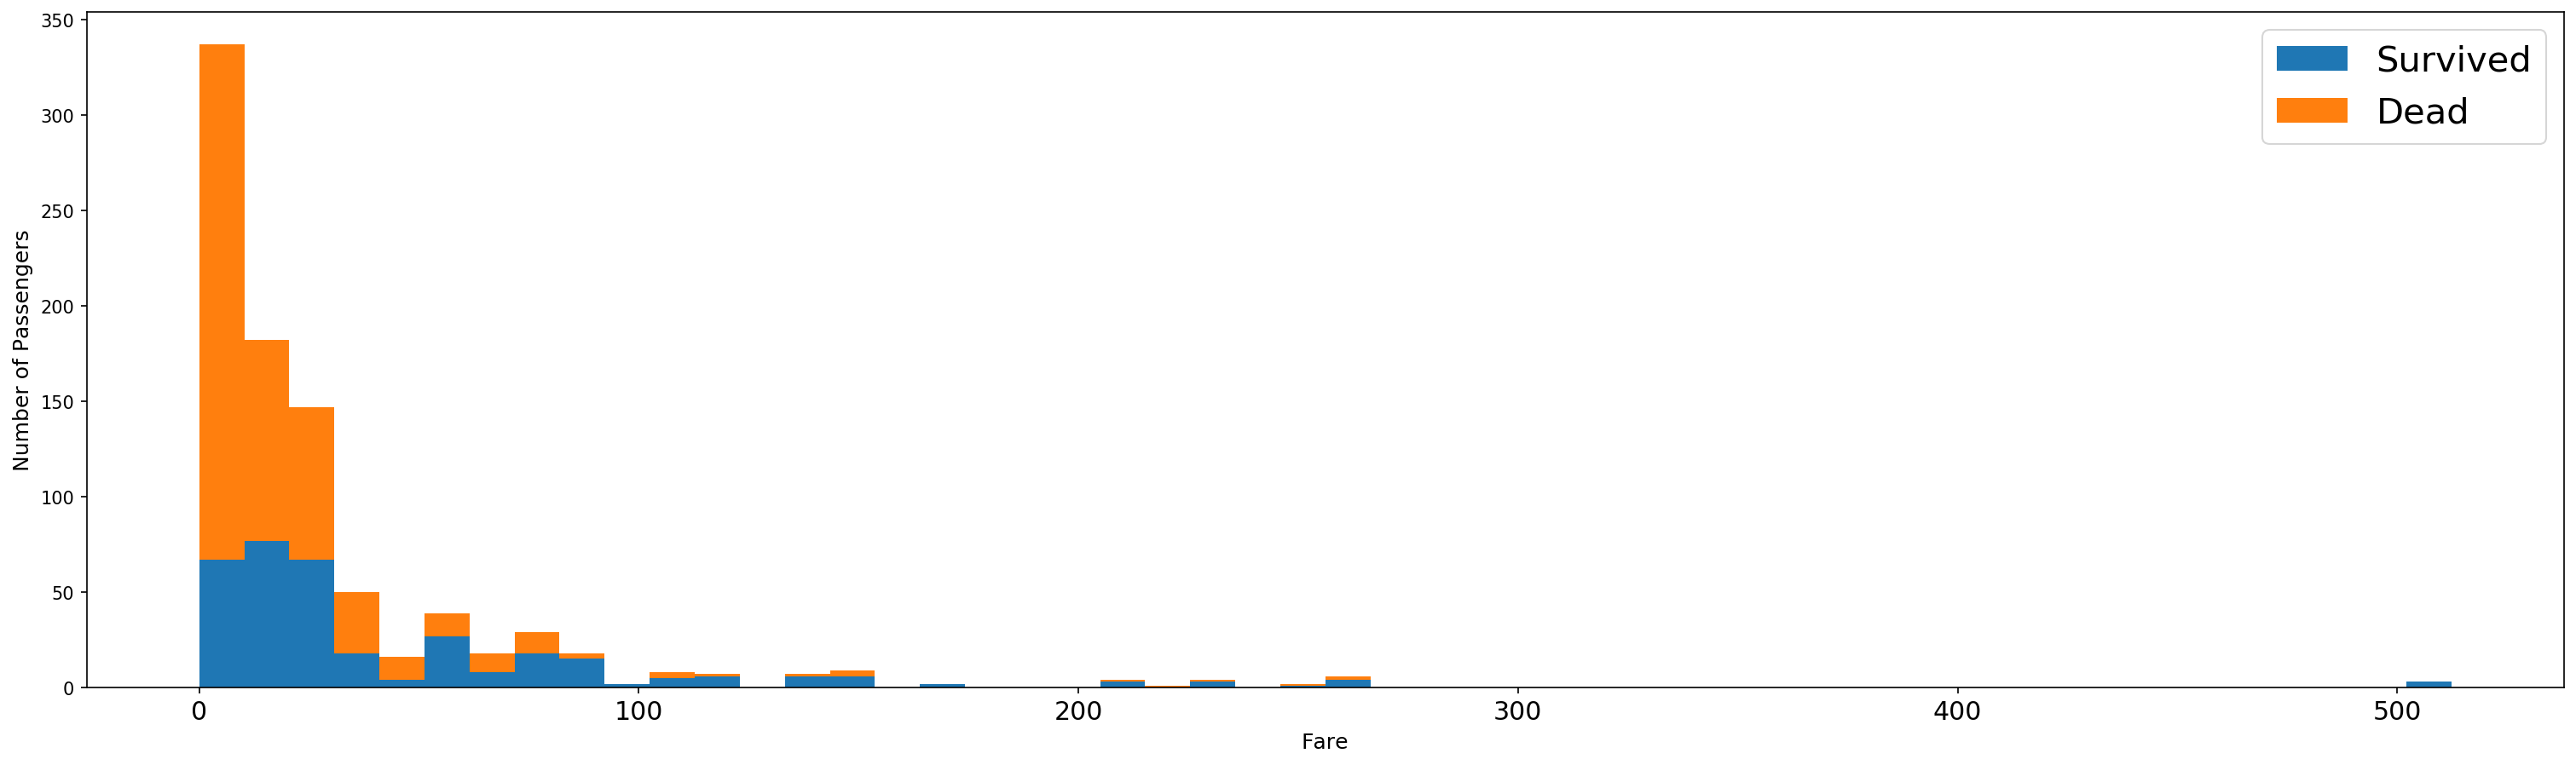

In [11]:
plt.hist([titanic[titanic["Survived"] == 1]["Fare"] , titanic[titanic["Survived"] == 0]["Fare"]] ,
         stacked = True , bins = 50 , label = ["Survived" , "Dead"])
plt.xlabel("Fare")
plt.ylabel("Number of Passengers")
plt.legend()

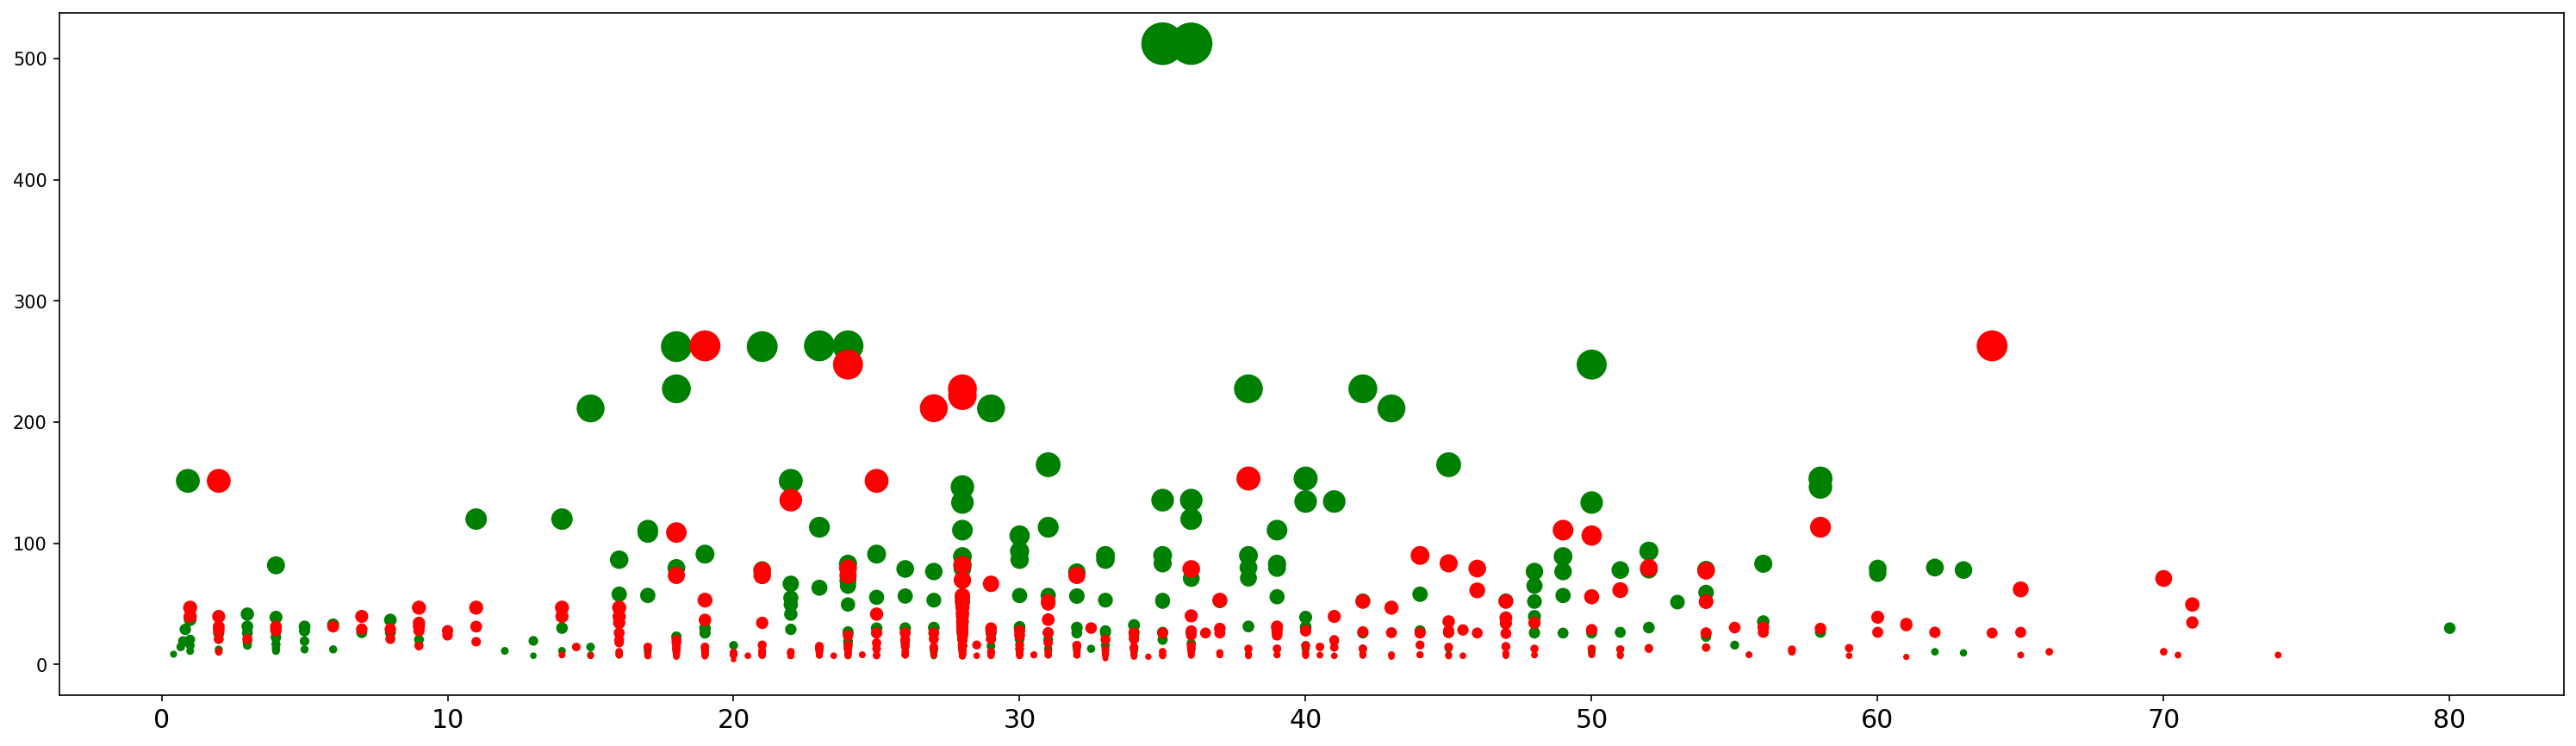

In [12]:
ax = plt.subplot()

ax.scatter(titanic[titanic["Survived"] == 1]["Age"] , titanic[titanic["Survived"] == 1]["Fare"] , 
          c = "green" , s = titanic[titanic["Survived"] == 1]["Fare"])
ax.scatter(titanic[titanic['Survived'] == 0]['Age'], titanic[titanic['Survived'] == 0]['Fare'], 
           c='red', s=titanic[titanic['Survived'] == 0]['Fare']);

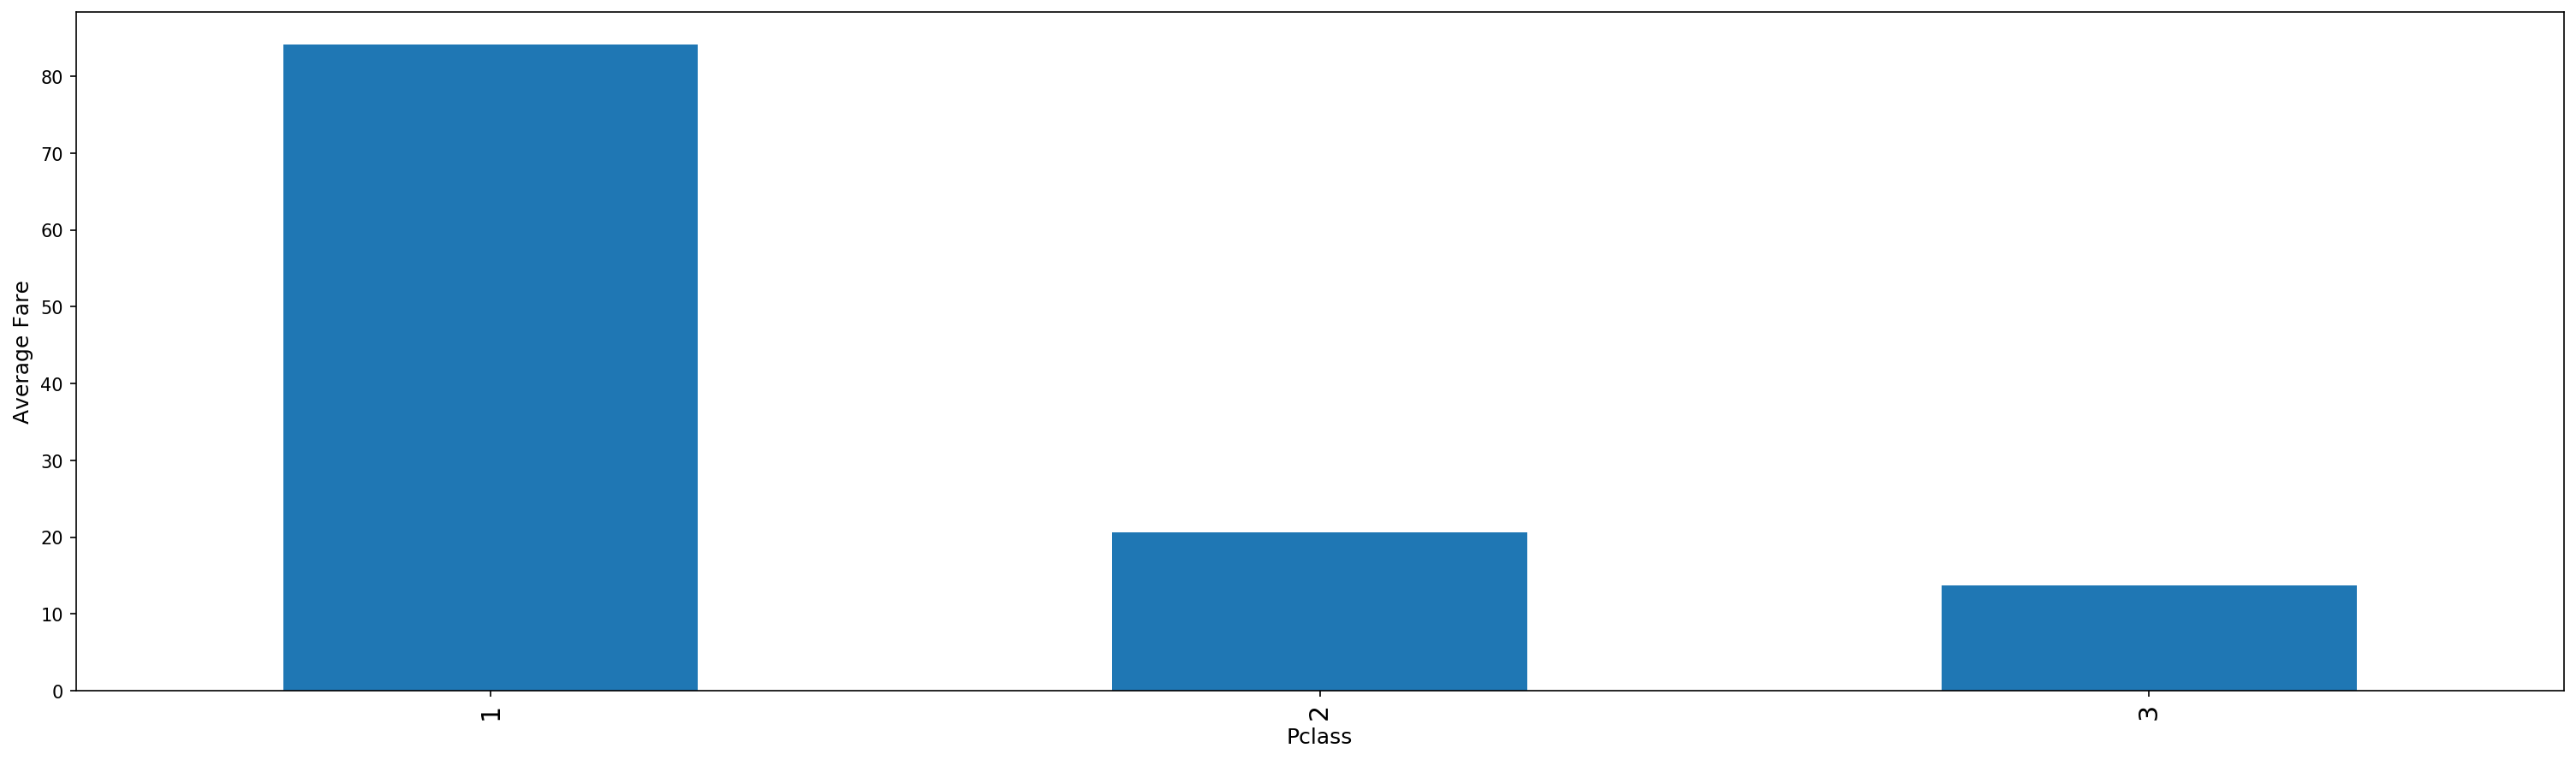

In [13]:
ax = plt.subplot()

ax.set_ylabel("Average Fare")
titanic.groupby("Pclass").mean()["Fare"].plot(kind = "bar" , figsize = (25,7) , ax = ax)

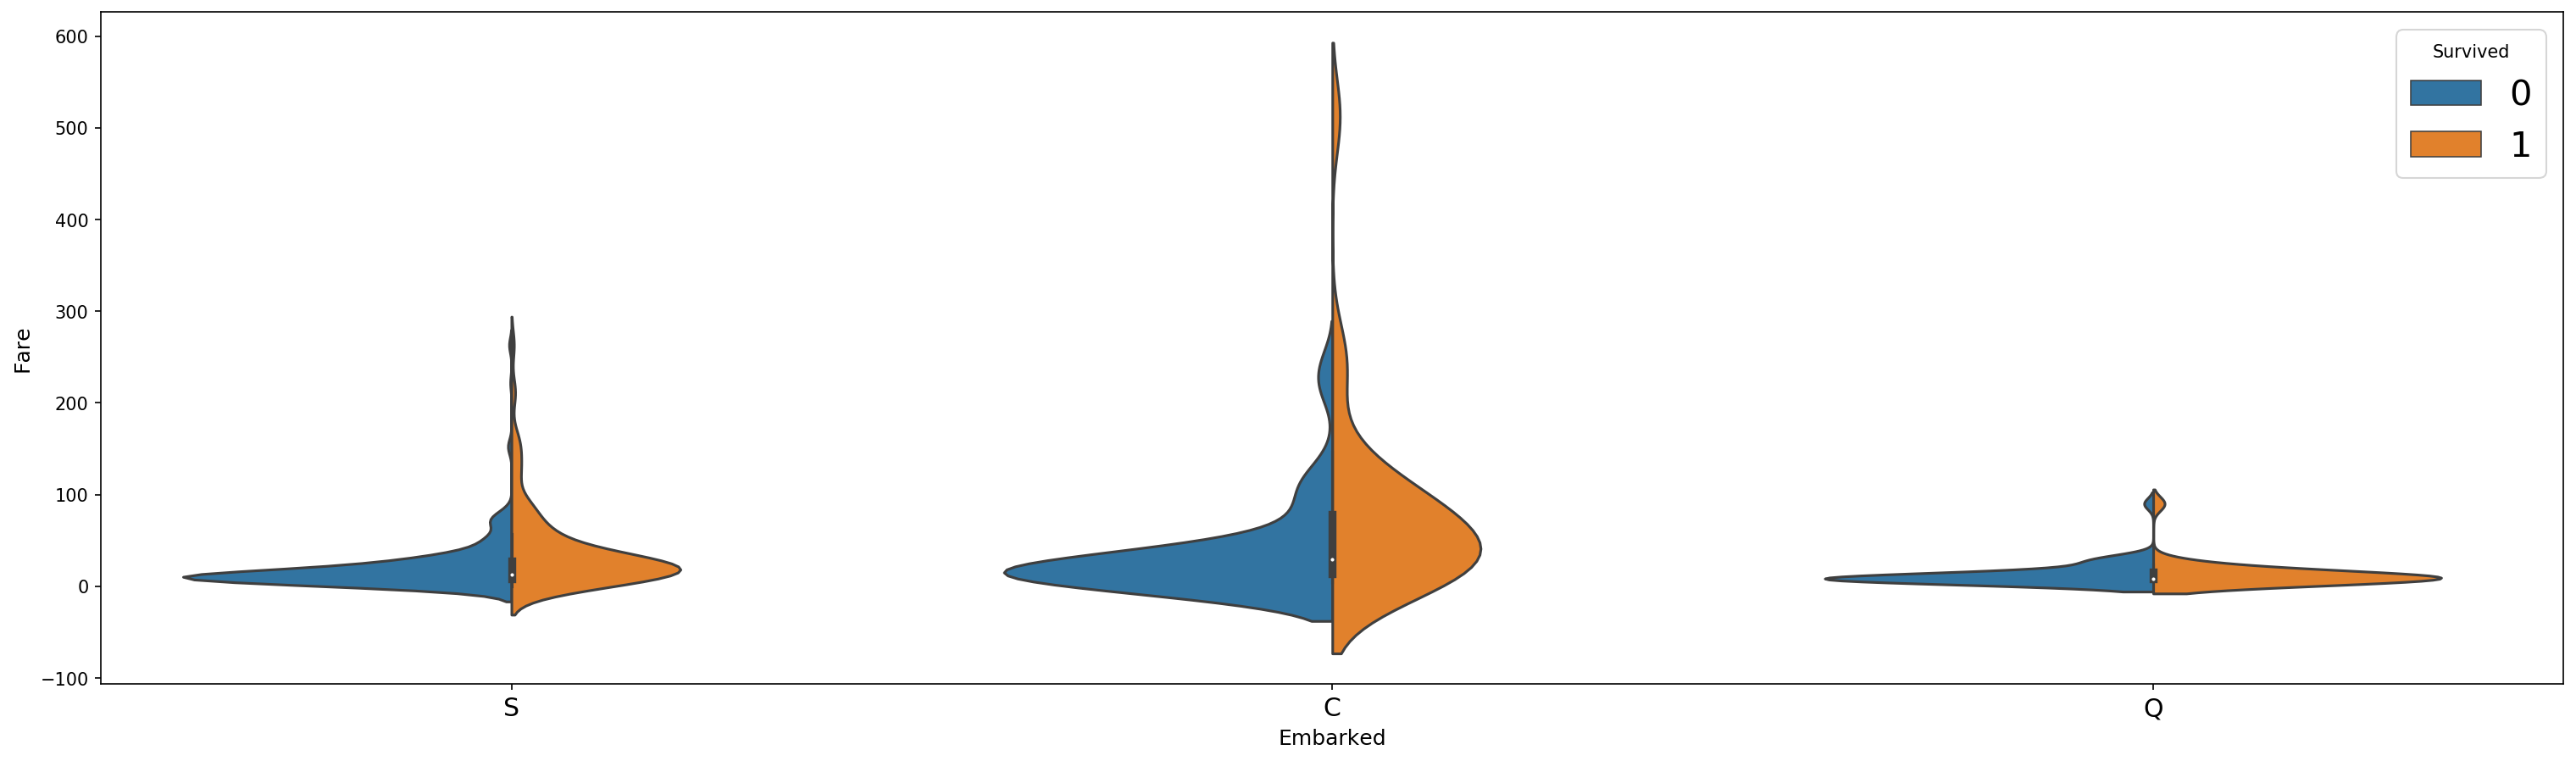

In [14]:
sns.violinplot(x="Embarked" , y="Fare" , hue="Survived" , data = titanic , split=True)

In [15]:
def get_combined_data():
    train = pd.read_csv("./Datasets/Titanic/train.csv")
    test = pd.read_csv("./Datasets/Titanic/test.csv")
    
    target = train["Survived"]
    train.drop("Survived" , axis = 1 , inplace = True)
    
    combined = train.append(test , ignore_index = True)
    combined.drop(["PassengerId"] , axis = 1 , inplace=True)
    
    return combined , target

titanic , target = get_combined_data()
titanic.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308
Pclass,3,1,3,1,3,3,1,3,3,2,3,1,3,3,3,2,3,2,3,3,2,2,3,1,3,3,3,1,3,3,1,1,3,2,1,1,3,3,3,3,3,2,3,2,3,3,3,3,3,3,...,1,2,2,1,1,2,1,1,3,2,1,3,3,3,3,3,2,2,3,2,3,3,1,1,3,2,3,1,3,1,3,3,1,2,1,1,1,2,2,1,3,3,3,1,3,3,1,3,3,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry","Moran, Mr. James","McCarthy, Mr. Timothy J","Palsson, Master. Gosta Leonard","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","Nasser, Mrs. Nicholas (Adele Achem)","Sandstrom, Miss. Marguerite Rut","Bonnell, Miss. Elizabeth","Saundercock, Mr. William Henry","Andersson, Mr. Anders Johan","Vestrom, Miss. Hulda Amanda Adolfina","Hewlett, Mrs. (Mary D Kingcome)","Rice, Master. Eugene","Williams, Mr. Charles Eugene","Vander Planke, Mrs. Julius (Emelia Maria Vande...","Masselmani, Mrs. Fatima","Fynney, Mr. Joseph J","Beesley, Mr. Lawrence","McGowan, Miss. Anna ""Annie""","Sloper, Mr. William Thompson","Palsson, Miss. Torborg Danira","Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...","Emir, Mr. Farred Chehab","Fortune, Mr. Charles Alexander","O'Dwyer, Miss. Ellen ""Nellie""","Todoroff, Mr. Lalio","Uruchurtu, Don. Manuel E","Spencer, Mrs. William Augustus (Marie Eugenie)","Glynn, Miss. Mary Agatha","Wheadon, Mr. Edward H","Meyer, Mr. Edgar Joseph","Holverson, Mr. Alexander Oskar","Mamee, Mr. Hanna","Cann, Mr. Ernest Charles","Vander Planke, Miss. Augusta Maria","Nicola-Yarred, Miss. Jamila","Ahlin, Mrs. Johan (Johanna Persdotter Larsson)","Turpin, Mrs. William John Robert (Dorothy Ann ...","Kraeff, Mr. Theodor","Laroche, Miss. Simonne Marie Anne Andree","Devaney, Miss. Margaret Delia","Rogers, Mr. William John","Lennon, Mr. Denis","O'Driscoll, Miss. Bridget","Samaan, Mr. Youssef","Arnold-Franchi, Mrs. Josef (Josefine Franchi)",...,"Gibson, Mrs. Leonard (Pauline C Boeson)","Pallas y Castello, Mr. Emilio","Giles, Mr. Edgar","Wilson, Miss. Helen Alice","Ismay, Mr. Joseph Bruce","Harbeck, Mr. William H","Dodge, Mrs. Washington (Ruth Vidaver)","Bowen, Miss. Grace Scott","Kink, Miss. Maria","Cotterill, Mr. Henry Harry""""","Hipkins, Mr. William Edward","Asplund, Master. Carl Edgar","O'Connor, Mr. Patrick","Foley, Mr. Joseph","Risien, Mrs. Samuel (Emma)","McNamee, Mrs. Neal (Eileen O'Leary)","Wheeler, Mr. Edwin Frederick""""","Herman, Miss. Kate","Aronsson, Mr. Ernst Axel Algot","Ashby, Mr. John","Canavan, Mr. Patrick","Palsson, Master. Paul Folke","Payne, Mr. Vivian Ponsonby","Lines, Mrs. Ernest H (Elizabeth Lindsey James)","Abbott, Master. Eugene Joseph","Gilbert, Mr. William","Kink-Heilmann, Mr. Anton","Smith, Mrs. Lucien Philip (Mary Eloise Hughes)","Colbert, Mr. Patrick","Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...","Larsson-Rondberg, Mr. Edvard A","Conlon, Mr. Thomas Henry","Bonnell, Miss. Caroline","Gale, Mr. Harry","Gibson, Miss. Dorothy Winifred","Carrau, Mr. Jose Pedro","Frauenthal, Mr. Isaac Gerald","Nourney, Mr. Alfred (Baron von Drachstedt"")""","Ware, Mr. William Jeffery","Widener, Mr. George Dunton","Riordan, Miss. Johanna Hannah""""","Peacock, Miss. Treasteall","Naughton, Miss. Hannah","Minahan, Mrs. William Edward (Lillian E Thorpe)","Henriksson, Miss. Jenny Lovisa","Spector, Mr. Woolf","Oliva y Ocana, Dona. Fermina","Saether, Mr. Simon Sivertsen","Ware, Mr. Frederick","Peter, Master. Michael J"
Sex,male,female,female,female,male,male,male,male,female,female,female,female,male,male,female,female,male,male,female,female,male,male,female,male,female,female,male,male,female,male,male,female,female,male,male,male,male,male,female,female,female,f

In [16]:
titles = set()
for name in titanic["Name"]:
    titles.add(name.split(",")[1].split(".")[0].strip())

print(titles)

{'Master', 'Dr', 'Col', 'Jonkheer', 'Major', 'Mrs', 'Mlle', 'the Countess', 'Sir', 'Lady', 'Miss', 'Capt', 'Ms', 'Don', 'Dona', 'Mr', 'Rev', 'Mme'}


In [17]:
Title_dict = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles(titanic):
    titanic["Title"] = titanic["Name"].apply(lambda name : name.split(",")[1].split(".")[0].strip())
    
    titanic["Title"] = titanic["Title"].map(Title_dict)
    return titanic

titanic = get_titles(titanic)
titanic.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308
Pclass,3,1,3,1,3,3,1,3,3,2,3,1,3,3,3,2,3,2,3,3,2,2,3,1,3,3,3,1,3,3,1,1,3,2,1,1,3,3,3,3,3,2,3,2,3,3,3,3,3,3,...,1,2,2,1,1,2,1,1,3,2,1,3,3,3,3,3,2,2,3,2,3,3,1,1,3,2,3,1,3,1,3,3,1,2,1,1,1,2,2,1,3,3,3,1,3,3,1,3,3,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry","Moran, Mr. James","McCarthy, Mr. Timothy J","Palsson, Master. Gosta Leonard","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","Nasser, Mrs. Nicholas (Adele Achem)","Sandstrom, Miss. Marguerite Rut","Bonnell, Miss. Elizabeth","Saundercock, Mr. William Henry","Andersson, Mr. Anders Johan","Vestrom, Miss. Hulda Amanda Adolfina","Hewlett, Mrs. (Mary D Kingcome)","Rice, Master. Eugene","Williams, Mr. Charles Eugene","Vander Planke, Mrs. Julius (Emelia Maria Vande...","Masselmani, Mrs. Fatima","Fynney, Mr. Joseph J","Beesley, Mr. Lawrence","McGowan, Miss. Anna ""Annie""","Sloper, Mr. William Thompson","Palsson, Miss. Torborg Danira","Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...","Emir, Mr. Farred Chehab","Fortune, Mr. Charles Alexander","O'Dwyer, Miss. Ellen ""Nellie""","Todoroff, Mr. Lalio","Uruchurtu, Don. Manuel E","Spencer, Mrs. William Augustus (Marie Eugenie)","Glynn, Miss. Mary Agatha","Wheadon, Mr. Edward H","Meyer, Mr. Edgar Joseph","Holverson, Mr. Alexander Oskar","Mamee, Mr. Hanna","Cann, Mr. Ernest Charles","Vander Planke, Miss. Augusta Maria","Nicola-Yarred, Miss. Jamila","Ahlin, Mrs. Johan (Johanna Persdotter Larsson)","Turpin, Mrs. William John Robert (Dorothy Ann ...","Kraeff, Mr. Theodor","Laroche, Miss. Simonne Marie Anne Andree","Devaney, Miss. Margaret Delia","Rogers, Mr. William John","Lennon, Mr. Denis","O'Driscoll, Miss. Bridget","Samaan, Mr. Youssef","Arnold-Franchi, Mrs. Josef (Josefine Franchi)",...,"Gibson, Mrs. Leonard (Pauline C Boeson)","Pallas y Castello, Mr. Emilio","Giles, Mr. Edgar","Wilson, Miss. Helen Alice","Ismay, Mr. Joseph Bruce","Harbeck, Mr. William H","Dodge, Mrs. Washington (Ruth Vidaver)","Bowen, Miss. Grace Scott","Kink, Miss. Maria","Cotterill, Mr. Henry Harry""""","Hipkins, Mr. William Edward","Asplund, Master. Carl Edgar","O'Connor, Mr. Patrick","Foley, Mr. Joseph","Risien, Mrs. Samuel (Emma)","McNamee, Mrs. Neal (Eileen O'Leary)","Wheeler, Mr. Edwin Frederick""""","Herman, Miss. Kate","Aronsson, Mr. Ernst Axel Algot","Ashby, Mr. John","Canavan, Mr. Patrick","Palsson, Master. Paul Folke","Payne, Mr. Vivian Ponsonby","Lines, Mrs. Ernest H (Elizabeth Lindsey James)","Abbott, Master. Eugene Joseph","Gilbert, Mr. William","Kink-Heilmann, Mr. Anton","Smith, Mrs. Lucien Philip (Mary Eloise Hughes)","Colbert, Mr. Patrick","Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...","Larsson-Rondberg, Mr. Edvard A","Conlon, Mr. Thomas Henry","Bonnell, Miss. Caroline","Gale, Mr. Harry","Gibson, Miss. Dorothy Winifred","Carrau, Mr. Jose Pedro","Frauenthal, Mr. Isaac Gerald","Nourney, Mr. Alfred (Baron von Drachstedt"")""","Ware, Mr. William Jeffery","Widener, Mr. George Dunton","Riordan, Miss. Johanna Hannah""""","Peacock, Miss. Treasteall","Naughton, Miss. Hannah","Minahan, Mrs. William Edward (Lillian E Thorpe)","Henriksson, Miss. Jenny Lovisa","Spector, Mr. Woolf","Oliva y Ocana, Dona. Fermina","Saether, Mr. Simon Sivertsen","Ware, Mr. Frederick","Peter, Master. Michael J"
Sex,male,female,female,female,male,male,male,male,female,female,female,female,male,male,female,female,male,male,female,female,male,male,female,male,female,female,male,male,female,male,male,female,female,male,male,male,male,male,female,female,female,f

In [18]:
titanic[titanic["Title"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


In [19]:
titanic.iloc[891:]["Age"].isnull().sum()

86

In [20]:
grp_train = titanic.iloc[:891].groupby(["Sex" , "Pclass" , "Title"]).median().reset_index()[["Sex" , "Pclass" , "Title" , "Age"]]
grp_train

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0
5,female,2,Mrs,31.5
6,female,3,Miss,18.0
7,female,3,Mrs,31.0
8,male,1,Master,4.0
9,male,1,Mr,40.0


In [21]:
def fill_ages(row):
    condition = (
        (grp_train["Sex"] == row["Sex"]) &
        (grp_train["Pclass"] == row["Pclass"]) &
        (grp_train["Title"] == row["Title"])
    )
    
    return grp_train[condition]["Age"].values[0]

titanic["Age"] = titanic.apply(lambda row : fill_ages(row) if np.isnan(row["Age"]) else row["Age"] , axis = 1)
titanic["Age"].isnull().sum()

0

In [22]:
def process_names(titanic):    
    titanic.drop("Name" , axis = 1 , inplace = True)
    
    # encoding in dummy variable
    title_dummies = pd.get_dummies(titanic["Title"] , prefix = "Title-")
    
    titanic = pd.concat([titanic , title_dummies], axis = 1)
    
    titanic.drop("Title" , axis = 1 , inplace = True)
    return titanic

titanic = process_names(titanic)
titanic.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308
Pclass,3,1,3,1,3,3,1,3,3,2,3,1,3,3,3,2,3,2,3,3,2,2,3,1,3,3,3,1,3,3,1,1,3,2,1,1,3,3,3,3,3,2,3,2,3,3,3,3,3,3,...,1,2,2,1,1,2,1,1,3,2,1,3,3,3,3,3,2,2,3,2,3,3,1,1,3,2,3,1,3,1,3,3,1,2,1,1,1,2,2,1,3,3,3,1,3,3,1,3,3,3
Sex,male,female,female,female,male,male,male,male,female,female,female,female,male,male,female,female,male,male,female,female,male,male,female,male,female,female,male,male,female,male,male,female,female,male,male,male,male,male,female,female,female,female,male,female,female,male,male,female,male,female,...,female,male,male,female,male,male,female,female,female,male,male,male,male,male,female,female,male,female,male,male,male,male,male,female,male,male,male,female,male,female,male,male,female,male,female,male,male,male,male,male,female,female,female,female,female,male,female,male,male,male
Age,22,38,26,35,35,26,54,2,27,14,4,58,20,39,14,55,2,31,31,31,35,34,15,28,8,38,26,19,18,26,40,40,18,66,28,42,26,21,18,14,40,27,26,3,19,26,26,18,26,18,...,45,29,21,31,49,44,54,45,22,21,55,5,26,26,31,19,31,24,24,57,21,6,23,51,13,47,29,18,24,48,22,31,30,38,22,17,43,20,23,50,18,3,18,37,28,26,39,38.5,26,4
SibSp,1,1,0,1,0,0,0,3,0,1,1,0,0,1,0,0,4,0,1,0,0,0,0,0,3,1,0,3,0,0,0,1,0,0,1,1,0,0,2,1,1,1,0,1,0,0,1,0,2,1,...,0,0,1,0,0,0,1,0,2,0,0,4,0,0,0,1,0,1,0,0,0,3,0,0,0,0,3,1,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1
Parch,0,0,0,0,0,0,0,1,2,0,1,0,0,5,0,0,1,0,0,0,0,0,0,0,1,5,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,2,0,0,0,1,0,1,2,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450,330877,17463,349909,347742,237736,PP 9549,113783,A/5. 2151,347082,350406,248706,382652,244373,345763,2649,239865,248698,330923,113788,349909,347077,2631,19950,330959,349216,PC 17601,PC 17569,335677,C.A. 24579,PC 17604,113789,2677,A./5. 2152,345764,2651,7546,11668,349253,SC/Paris 2123,330958,S.C./A.4. 23567,370371,14311,2662,349237,...,112378,SC/PARIS 2147,28133,16966,112058,248746,33638,PC 17608,315152,29107,680,347077,366713,330910,364498,376566,SC/PARIS 2159,220845,349911,244346,364858,349909,12749,PC 17592,C.A. 2673,C.A. 30769,315153,13695,371109,13567,347065,21332,36928,28664,112378,113059,17765,SC/PARIS 2166,28666,113503,334915,SOTON/O.Q. 3101315,365237,19928,347086,A.5. 3236,PC 17758,SOTON/O.Q. 3101262,359309,2668
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,16.7,26.55,8.05,31.275,7.8542,16,29.125,13,18,7.225,26,13,8.0292,35.5,21.075,31.3875,7.225,263,7.8792,7.8958,27.7208,146.521,7.75,10.5,82.1708,52,7.2292,8.05,18,11.2417,9.475,21,7.8958,41.5792,7.8792,8.05,15.5,7.75,21.6792,17.8,...,59.4,13.8583,11.5,134.5,0,13,81.8583,262.375,8.6625,11.5,50,31.3875,7.75,7.8792,14.5,16.1,12.875,65,7.775,13,7.75,21.075,93.5,39.4,20.25,10.5,22.025,60,7.25,79.2,7.775,7.7333,164.867,21,59.4,47.1,27.7208,13.8625,10.5,211.5,7.7208,13.775,7.75,90,7.775,8.05,108.9,7.25,8.05,22.3583
Cabin,NaN,C85,NaN,C123,NaN,NaN,E46,NaN,NaN,NaN,G6,C103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D56,NaN,A6,NaN,NaN,NaN,C23 C25 C27,NaN,NaN,NaN,B78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,E39 E41,B52 B54 B56,NaN,A34,NaN,NaN,NaN,C39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B24,D28,NaN,NaN,NaN,C31,NaN,B41,NaN,NaN,C7,NaN,NaN,NaN,D40,D38,NaN,C80,NaN,NaN,NaN,C78,NaN,NaN,C105,NaN,NaN,NaN
Embarked,S,C,S,S,S,Q,S,S,S,C,S,S,S,S,S,S,Q,S,S,C,S,S,Q,S,S,S,C,S,Q,S,C,C,Q,S,C,S,C,S,S,C,S,S,C,C,Q,S,Q,Q,C,S,...,C,C,S,C,S,S,S,C,S,S,S,S,Q,Q,S,S,S,S,S,S,Q,S,S,S,S,S,S,S,Q,C,S,Q,S,S,C,S,C,C,S,C,Q,S,Q,Q,S,S,C,S,S,C
Title-_Master,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0

In [23]:
# Woriking with Fares
titanic["Fare"].fillna(titanic["Fare"].mean() , inplace=True)
titanic["Fare"].isnull().sum()

0

In [24]:
def process_embarked(titanic):
    titanic["Embarked"].fillna(titanic["Embarked"].mode() , inplace = True)
    
    embarked_dummies = pd.get_dummies(titanic["Embarked"] , prefix="Embarked-")
    titanic = pd.concat([titanic , embarked_dummies] , axis = 1)
    titanic.drop("Embarked" , axis = 1 , inplace = True)
    
    return titanic

titanic = process_embarked(titanic)
titanic.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308
Pclass,3,1,3,1,3,3,1,3,3,2,3,1,3,3,3,2,3,2,3,3,2,2,3,1,3,3,3,1,3,3,1,1,3,2,1,1,3,3,3,3,3,2,3,2,3,3,3,3,3,3,...,1,2,2,1,1,2,1,1,3,2,1,3,3,3,3,3,2,2,3,2,3,3,1,1,3,2,3,1,3,1,3,3,1,2,1,1,1,2,2,1,3,3,3,1,3,3,1,3,3,3
Sex,male,female,female,female,male,male,male,male,female,female,female,female,male,male,female,female,male,male,female,female,male,male,female,male,female,female,male,male,female,male,male,female,female,male,male,male,male,male,female,female,female,female,male,female,female,male,male,female,male,female,...,female,male,male,female,male,male,female,female,female,male,male,male,male,male,female,female,male,female,male,male,male,male,male,female,male,male,male,female,male,female,male,male,female,male,female,male,male,male,male,male,female,female,female,female,female,male,female,male,male,male
Age,22,38,26,35,35,26,54,2,27,14,4,58,20,39,14,55,2,31,31,31,35,34,15,28,8,38,26,19,18,26,40,40,18,66,28,42,26,21,18,14,40,27,26,3,19,26,26,18,26,18,...,45,29,21,31,49,44,54,45,22,21,55,5,26,26,31,19,31,24,24,57,21,6,23,51,13,47,29,18,24,48,22,31,30,38,22,17,43,20,23,50,18,3,18,37,28,26,39,38.5,26,4
SibSp,1,1,0,1,0,0,0,3,0,1,1,0,0,1,0,0,4,0,1,0,0,0,0,0,3,1,0,3,0,0,0,1,0,0,1,1,0,0,2,1,1,1,0,1,0,0,1,0,2,1,...,0,0,1,0,0,0,1,0,2,0,0,4,0,0,0,1,0,1,0,0,0,3,0,0,0,0,3,1,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1
Parch,0,0,0,0,0,0,0,1,2,0,1,0,0,5,0,0,1,0,0,0,0,0,0,0,1,5,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,2,0,0,0,1,0,1,2,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450,330877,17463,349909,347742,237736,PP 9549,113783,A/5. 2151,347082,350406,248706,382652,244373,345763,2649,239865,248698,330923,113788,349909,347077,2631,19950,330959,349216,PC 17601,PC 17569,335677,C.A. 24579,PC 17604,113789,2677,A./5. 2152,345764,2651,7546,11668,349253,SC/Paris 2123,330958,S.C./A.4. 23567,370371,14311,2662,349237,...,112378,SC/PARIS 2147,28133,16966,112058,248746,33638,PC 17608,315152,29107,680,347077,366713,330910,364498,376566,SC/PARIS 2159,220845,349911,244346,364858,349909,12749,PC 17592,C.A. 2673,C.A. 30769,315153,13695,371109,13567,347065,21332,36928,28664,112378,113059,17765,SC/PARIS 2166,28666,113503,334915,SOTON/O.Q. 3101315,365237,19928,347086,A.5. 3236,PC 17758,SOTON/O.Q. 3101262,359309,2668
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,16.7,26.55,8.05,31.275,7.8542,16,29.125,13,18,7.225,26,13,8.0292,35.5,21.075,31.3875,7.225,263,7.8792,7.8958,27.7208,146.521,7.75,10.5,82.1708,52,7.2292,8.05,18,11.2417,9.475,21,7.8958,41.5792,7.8792,8.05,15.5,7.75,21.6792,17.8,...,59.4,13.8583,11.5,134.5,0,13,81.8583,262.375,8.6625,11.5,50,31.3875,7.75,7.8792,14.5,16.1,12.875,65,7.775,13,7.75,21.075,93.5,39.4,20.25,10.5,22.025,60,7.25,79.2,7.775,7.7333,164.867,21,59.4,47.1,27.7208,13.8625,10.5,211.5,7.7208,13.775,7.75,90,7.775,8.05,108.9,7.25,8.05,22.3583
Cabin,NaN,C85,NaN,C123,NaN,NaN,E46,NaN,NaN,NaN,G6,C103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D56,NaN,A6,NaN,NaN,NaN,C23 C25 C27,NaN,NaN,NaN,B78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,E39 E41,B52 B54 B56,NaN,A34,NaN,NaN,NaN,C39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B24,D28,NaN,NaN,NaN,C31,NaN,B41,NaN,NaN,C7,NaN,NaN,NaN,D40,D38,NaN,C80,NaN,NaN,NaN,C78,NaN,NaN,C105,NaN,NaN,NaN
Title-_Master,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Title-_Miss,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,

In [25]:
# Processing cabin
train_cabin , test_cabin = set() , set()

for cabin in titanic.iloc[:891]["Cabin"]:
    try:
        train_cabin.add(cabin[0])
    except:
        train_cabin.add("U")

for cabin in titanic.iloc[891:]['Cabin']:
    try:
        test_cabin.add(cabin[0])
    except:
        test_cabin.add('U')
        
print(train_cabin , test_cabin)

{'G', 'C', 'A', 'E', 'T', 'F', 'U', 'D', 'B'} {'G', 'C', 'A', 'E', 'F', 'U', 'D', 'B'}


In [26]:
def process_cabins(titanic):
    titanic["Cabin"].fillna("U" , inplace = True)
    
    titanic["Cabin"] = titanic["Cabin"].apply(lambda cabin : cabin[0])
    
    cabin_dummies = pd.get_dummies(titanic["Cabin"] , prefix="Cabin-")
    titanic = pd.concat([titanic , cabin_dummies] , axis = 1)
    
    titanic.drop("Cabin" , axis = 1 , inplace = True)
    return titanic

titanic = process_cabins(titanic)
titanic.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308
Pclass,3,1,3,1,3,3,1,3,3,2,3,1,3,3,3,2,3,2,3,3,2,2,3,1,3,3,3,1,3,3,1,1,3,2,1,1,3,3,3,3,3,2,3,2,3,3,3,3,3,3,...,1,2,2,1,1,2,1,1,3,2,1,3,3,3,3,3,2,2,3,2,3,3,1,1,3,2,3,1,3,1,3,3,1,2,1,1,1,2,2,1,3,3,3,1,3,3,1,3,3,3
Sex,male,female,female,female,male,male,male,male,female,female,female,female,male,male,female,female,male,male,female,female,male,male,female,male,female,female,male,male,female,male,male,female,female,male,male,male,male,male,female,female,female,female,male,female,female,male,male,female,male,female,...,female,male,male,female,male,male,female,female,female,male,male,male,male,male,female,female,male,female,male,male,male,male,male,female,male,male,male,female,male,female,male,male,female,male,female,male,male,male,male,male,female,female,female,female,female,male,female,male,male,male
Age,22,38,26,35,35,26,54,2,27,14,4,58,20,39,14,55,2,31,31,31,35,34,15,28,8,38,26,19,18,26,40,40,18,66,28,42,26,21,18,14,40,27,26,3,19,26,26,18,26,18,...,45,29,21,31,49,44,54,45,22,21,55,5,26,26,31,19,31,24,24,57,21,6,23,51,13,47,29,18,24,48,22,31,30,38,22,17,43,20,23,50,18,3,18,37,28,26,39,38.5,26,4
SibSp,1,1,0,1,0,0,0,3,0,1,1,0,0,1,0,0,4,0,1,0,0,0,0,0,3,1,0,3,0,0,0,1,0,0,1,1,0,0,2,1,1,1,0,1,0,0,1,0,2,1,...,0,0,1,0,0,0,1,0,2,0,0,4,0,0,0,1,0,1,0,0,0,3,0,0,0,0,3,1,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1
Parch,0,0,0,0,0,0,0,1,2,0,1,0,0,5,0,0,1,0,0,0,0,0,0,0,1,5,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,2,0,0,0,1,0,1,2,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450,330877,17463,349909,347742,237736,PP 9549,113783,A/5. 2151,347082,350406,248706,382652,244373,345763,2649,239865,248698,330923,113788,349909,347077,2631,19950,330959,349216,PC 17601,PC 17569,335677,C.A. 24579,PC 17604,113789,2677,A./5. 2152,345764,2651,7546,11668,349253,SC/Paris 2123,330958,S.C./A.4. 23567,370371,14311,2662,349237,...,112378,SC/PARIS 2147,28133,16966,112058,248746,33638,PC 17608,315152,29107,680,347077,366713,330910,364498,376566,SC/PARIS 2159,220845,349911,244346,364858,349909,12749,PC 17592,C.A. 2673,C.A. 30769,315153,13695,371109,13567,347065,21332,36928,28664,112378,113059,17765,SC/PARIS 2166,28666,113503,334915,SOTON/O.Q. 3101315,365237,19928,347086,A.5. 3236,PC 17758,SOTON/O.Q. 3101262,359309,2668
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,16.7,26.55,8.05,31.275,7.8542,16,29.125,13,18,7.225,26,13,8.0292,35.5,21.075,31.3875,7.225,263,7.8792,7.8958,27.7208,146.521,7.75,10.5,82.1708,52,7.2292,8.05,18,11.2417,9.475,21,7.8958,41.5792,7.8792,8.05,15.5,7.75,21.6792,17.8,...,59.4,13.8583,11.5,134.5,0,13,81.8583,262.375,8.6625,11.5,50,31.3875,7.75,7.8792,14.5,16.1,12.875,65,7.775,13,7.75,21.075,93.5,39.4,20.25,10.5,22.025,60,7.25,79.2,7.775,7.7333,164.867,21,59.4,47.1,27.7208,13.8625,10.5,211.5,7.7208,13.775,7.75,90,7.775,8.05,108.9,7.25,8.05,22.3583
Title-_Master,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Title-_Miss,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0
Title-_Mr,1,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,0,...,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,0,1,0,1,1,1,0,1,0,0,1,1,0,1,0,1,1,0,1,0,1,1,1,1,1,0,0,0,0,0,1,0,1,1,0


In [27]:
titanic["Sex"] = titanic["Sex"].map({"male" : 1 , "female" : 0})
titanic.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308
Pclass,3,1,3,1,3,3,1,3,3,2,3,1,3,3,3,2,3,2,3,3,2,2,3,1,3,3,3,1,3,3,1,1,3,2,1,1,3,3,3,3,3,2,3,2,3,3,3,3,3,3,...,1,2,2,1,1,2,1,1,3,2,1,3,3,3,3,3,2,2,3,2,3,3,1,1,3,2,3,1,3,1,3,3,1,2,1,1,1,2,2,1,3,3,3,1,3,3,1,3,3,3
Sex,1,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,0,1,1,0,1,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,0,...,0,1,1,0,1,1,0,0,0,1,1,1,1,1,0,0,1,0,1,1,1,1,1,0,1,1,1,0,1,0,1,1,0,1,0,1,1,1,1,1,0,0,0,0,0,1,0,1,1,1
Age,22,38,26,35,35,26,54,2,27,14,4,58,20,39,14,55,2,31,31,31,35,34,15,28,8,38,26,19,18,26,40,40,18,66,28,42,26,21,18,14,40,27,26,3,19,26,26,18,26,18,...,45,29,21,31,49,44,54,45,22,21,55,5,26,26,31,19,31,24,24,57,21,6,23,51,13,47,29,18,24,48,22,31,30,38,22,17,43,20,23,50,18,3,18,37,28,26,39,38.5,26,4
SibSp,1,1,0,1,0,0,0,3,0,1,1,0,0,1,0,0,4,0,1,0,0,0,0,0,3,1,0,3,0,0,0,1,0,0,1,1,0,0,2,1,1,1,0,1,0,0,1,0,2,1,...,0,0,1,0,0,0,1,0,2,0,0,4,0,0,0,1,0,1,0,0,0,3,0,0,0,0,3,1,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1
Parch,0,0,0,0,0,0,0,1,2,0,1,0,0,5,0,0,1,0,0,0,0,0,0,0,1,5,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,2,0,0,0,1,0,1,2,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450,330877,17463,349909,347742,237736,PP 9549,113783,A/5. 2151,347082,350406,248706,382652,244373,345763,2649,239865,248698,330923,113788,349909,347077,2631,19950,330959,349216,PC 17601,PC 17569,335677,C.A. 24579,PC 17604,113789,2677,A./5. 2152,345764,2651,7546,11668,349253,SC/Paris 2123,330958,S.C./A.4. 23567,370371,14311,2662,349237,...,112378,SC/PARIS 2147,28133,16966,112058,248746,33638,PC 17608,315152,29107,680,347077,366713,330910,364498,376566,SC/PARIS 2159,220845,349911,244346,364858,349909,12749,PC 17592,C.A. 2673,C.A. 30769,315153,13695,371109,13567,347065,21332,36928,28664,112378,113059,17765,SC/PARIS 2166,28666,113503,334915,SOTON/O.Q. 3101315,365237,19928,347086,A.5. 3236,PC 17758,SOTON/O.Q. 3101262,359309,2668
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,16.7,26.55,8.05,31.275,7.8542,16,29.125,13,18,7.225,26,13,8.0292,35.5,21.075,31.3875,7.225,263,7.8792,7.8958,27.7208,146.521,7.75,10.5,82.1708,52,7.2292,8.05,18,11.2417,9.475,21,7.8958,41.5792,7.8792,8.05,15.5,7.75,21.6792,17.8,...,59.4,13.8583,11.5,134.5,0,13,81.8583,262.375,8.6625,11.5,50,31.3875,7.75,7.8792,14.5,16.1,12.875,65,7.775,13,7.75,21.075,93.5,39.4,20.25,10.5,22.025,60,7.25,79.2,7.775,7.7333,164.867,21,59.4,47.1,27.7208,13.8625,10.5,211.5,7.7208,13.775,7.75,90,7.775,8.05,108.9,7.25,8.05,22.3583
Title-_Master,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Title-_Miss,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0
Title-_Mr,1,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,0,...,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,0,1,0,1,1,1,0,1,0,0,1,1,0,1,0,1,1,0,1,0,1,1,1,1,1,0,0,0,0,0,1,0,1,1,0


In [28]:
def process_Pclass(titanic):
    Pclass_dummies = pd.get_dummies(titanic["Pclass"] , prefix="Pclass-")
    titanic = pd.concat([titanic , Pclass_dummies] , axis = 1)
    titanic.drop("Pclass" , axis = 1 , inplace = True)
    return titanic

titanic = process_Pclass(titanic)
titanic.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308
Sex,1,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,0,1,1,0,1,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,0,...,0,1,1,0,1,1,0,0,0,1,1,1,1,1,0,0,1,0,1,1,1,1,1,0,1,1,1,0,1,0,1,1,0,1,0,1,1,1,1,1,0,0,0,0,0,1,0,1,1,1
Age,22,38,26,35,35,26,54,2,27,14,4,58,20,39,14,55,2,31,31,31,35,34,15,28,8,38,26,19,18,26,40,40,18,66,28,42,26,21,18,14,40,27,26,3,19,26,26,18,26,18,...,45,29,21,31,49,44,54,45,22,21,55,5,26,26,31,19,31,24,24,57,21,6,23,51,13,47,29,18,24,48,22,31,30,38,22,17,43,20,23,50,18,3,18,37,28,26,39,38.5,26,4
SibSp,1,1,0,1,0,0,0,3,0,1,1,0,0,1,0,0,4,0,1,0,0,0,0,0,3,1,0,3,0,0,0,1,0,0,1,1,0,0,2,1,1,1,0,1,0,0,1,0,2,1,...,0,0,1,0,0,0,1,0,2,0,0,4,0,0,0,1,0,1,0,0,0,3,0,0,0,0,3,1,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1
Parch,0,0,0,0,0,0,0,1,2,0,1,0,0,5,0,0,1,0,0,0,0,0,0,0,1,5,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,2,0,0,0,1,0,1,2,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450,330877,17463,349909,347742,237736,PP 9549,113783,A/5. 2151,347082,350406,248706,382652,244373,345763,2649,239865,248698,330923,113788,349909,347077,2631,19950,330959,349216,PC 17601,PC 17569,335677,C.A. 24579,PC 17604,113789,2677,A./5. 2152,345764,2651,7546,11668,349253,SC/Paris 2123,330958,S.C./A.4. 23567,370371,14311,2662,349237,...,112378,SC/PARIS 2147,28133,16966,112058,248746,33638,PC 17608,315152,29107,680,347077,366713,330910,364498,376566,SC/PARIS 2159,220845,349911,244346,364858,349909,12749,PC 17592,C.A. 2673,C.A. 30769,315153,13695,371109,13567,347065,21332,36928,28664,112378,113059,17765,SC/PARIS 2166,28666,113503,334915,SOTON/O.Q. 3101315,365237,19928,347086,A.5. 3236,PC 17758,SOTON/O.Q. 3101262,359309,2668
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,16.7,26.55,8.05,31.275,7.8542,16,29.125,13,18,7.225,26,13,8.0292,35.5,21.075,31.3875,7.225,263,7.8792,7.8958,27.7208,146.521,7.75,10.5,82.1708,52,7.2292,8.05,18,11.2417,9.475,21,7.8958,41.5792,7.8792,8.05,15.5,7.75,21.6792,17.8,...,59.4,13.8583,11.5,134.5,0,13,81.8583,262.375,8.6625,11.5,50,31.3875,7.75,7.8792,14.5,16.1,12.875,65,7.775,13,7.75,21.075,93.5,39.4,20.25,10.5,22.025,60,7.25,79.2,7.775,7.7333,164.867,21,59.4,47.1,27.7208,13.8625,10.5,211.5,7.7208,13.775,7.75,90,7.775,8.05,108.9,7.25,8.05,22.3583
Title-_Master,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Title-_Miss,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0
Title-_Mr,1,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,0,...,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,0,1,0,1,1,1,0,1,0,0,1,1,0,1,0,1,1,0,1,0,1,1,1,1,1,0,0,0,0,0,1,0,1,1,0
Title-_Mrs,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [29]:
# Tickets
def clean_ticket(ticket):
    ticket = ticket.replace("." , "")
    ticket = ticket.replace("/" , "")
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    
    if len(ticket) > 0:
        return ticket[0]
    else:
        return "XXX"

ticket = set()
for t in titanic["Ticket"]:
    ticket.add(clean_ticket(t))

print(ticket)

{'C', 'SWPP', 'A', 'STONO2', 'SCA4', 'SCA3', 'WEP', 'SOP', 'AS', 'LP', 'LINE', 'PC', 'AQ3', 'WC', 'SCOW', 'AQ4', 'SP', 'SOTONOQ', 'SCParis', 'PPP', 'PP', 'STONO', 'Fa', 'A4', 'FC', 'SOPP', 'SOTONO2', 'CASOTON', 'FCC', 'XXX', 'CA', 'SC', 'SCAH', 'SCPARIS', 'SOC', 'STONOQ', 'A5'}


In [30]:
len(ticket)

37

In [31]:
def process_tickets(titanic):
    titanic["Ticket"] = titanic["Ticket"].apply(clean_ticket)
    ticket_dummies = pd.get_dummies(titanic["Ticket"] , prefix="Ticket")
    titanic = pd.concat([titanic , ticket_dummies] , axis = 1)
    titanic.drop("Ticket" , axis = 1 , inplace = True)
    return titanic

titanic = process_tickets(titanic)
titanic.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308
Sex,1.00,0.0000,0.000,0.0,1.00,1.0000,1.0000,1.000,0.0000,0.0000,0.0,0.00,1.00,1.000,0.0000,0.0,1.000,1.0,0.0,0.000,1.0,1.0,0.0000,1.0,0.000,0.0000,1.000,1.0,0.0000,1.0000,1.0000,0.0000,0.00,1.0,1.0000,1.0,1.0000,1.00,0.0,0.0000,0.000,0.0,1.0000,0.0000,0.0000,1.00,1.0,0.00,1.0000,0.0,...,0.0,1.0000,1.0,0.0,1.0,1.0,0.0000,0.000,0.0000,1.0,1.0,1.0000,1.00,1.0000,0.0,0.0,1.000,0.0,1.000,1.0,1.00,1.000,1.0,0.0,1.00,1.0,1.000,0.0,1.00,0.0,1.000,1.0000,0.0000,1.0,0.0,1.0,1.0000,1.0000,1.0,1.0,0.0000,0.000,0.00,0.0,0.000,1.00,0.0,1.00,1.00,1.0000
Age,22.00,38.0000,26.000,35.0,35.00,26.0000,54.0000,2.000,27.0000,14.0000,4.0,58.00,20.00,39.000,14.0000,55.0,2.000,31.0,31.0,31.000,35.0,34.0,15.0000,28.0,8.000,38.0000,26.000,19.0,18.0000,26.0000,40.0000,40.0000,18.00,66.0,28.0000,42.0,26.0000,21.00,18.0,14.0000,40.000,27.0,26.0000,3.0000,19.0000,26.00,26.0,18.00,26.0000,18.0,...,45.0,29.0000,21.0,31.0,49.0,44.0,54.0000,45.000,22.0000,21.0,55.0,5.0000,26.00,26.0000,31.0,19.0,31.000,24.0,24.000,57.0,21.00,6.000,23.0,51.0,13.00,47.0,29.000,18.0,24.00,48.0,22.000,31.0000,30.0000,38.0,22.0,17.0,43.0000,20.0000,23.0,50.0,18.0000,3.000,18.00,37.0,28.000,26.00,39.0,38.50,26.00,4.0000
SibSp,1.00,1.0000,0.000,1.0,0.00,0.0000,0.0000,3.000,0.0000,1.0000,1.0,0.00,0.00,1.000,0.0000,0.0,4.000,0.0,1.0,0.000,0.0,0.0,0.0000,0.0,3.000,1.0000,0.000,3.0,0.0000,0.0000,0.0000,1.0000,0.00,0.0,1.0000,1.0,0.0000,0.00,2.0,1.0000,1.000,1.0,0.0000,1.0000,0.0000,0.00,1.0,0.00,2.0000,1.0,...,0.0,0.0000,1.0,0.0,0.0,0.0,1.0000,0.000,2.0000,0.0,0.0,4.0000,0.00,0.0000,0.0,1.0,0.000,1.0,0.000,0.0,0.00,3.000,0.0,0.0,0.00,0.0,3.000,1.0,0.00,1.0,0.000,0.0000,0.0000,1.0,0.0,0.0,1.0000,0.0000,1.0,1.0,0.0000,1.000,0.00,1.0,0.000,0.00,0.0,0.00,0.00,1.0000
Parch,0.00,0.0000,0.000,0.0,0.00,0.0000,0.0000,1.000,2.0000,0.0000,1.0,0.00,0.00,5.000,0.0000,0.0,1.000,0.0,0.0,0.000,0.0,0.0,0.0000,0.0,1.000,5.0000,0.000,2.0,0.0000,0.0000,0.0000,0.0000,0.00,0.0,0.0000,0.0,0.0000,0.00,0.0,0.0000,0.000,0.0,0.0000,2.0000,0.0000,0.00,0.0,0.00,0.0000,0.0,...,1.0,0.0000,0.0,0.0,0.0,0.0,1.0000,0.000,0.0000,0.0,0.0,2.0000,0.00,0.0000,0.0,0.0,0.000,2.0,0.000,0.0,0.00,1.000,0.0,1.0,2.00,0.0,1.000,0.0,0.00,1.0,0.000,0.0000,0.0000,0.0,1.0,0.0,0.0000,0.0000,0.0,1.0,0.0000,1.000,0.00,0.0,0.000,0.00,0.0,0.00,0.00,1.0000
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,16.7,26.55,8.05,31.275,7.8542,16.0,29.125,13.0,18.0,7.225,26.0,13.0,8.0292,35.5,21.075,31.3875,7.225,263.0,7.8792,7.8958,27.7208,146.5208,7.75,10.5,82.1708,52.0,7.2292,8.05,18.0,11.2417,9.475,21.0,7.8958,41.5792,7.8792,8.05,15.5,7.75,21.6792,17.8,...,59.4,13.8583,11.5,134.5,0.0,13.0,81.8583,262.375,8.6625,11.5,50.0,31.3875,7.75,7.8792,14.5,16.1,12.875,65.0,7.775,13.0,7.75,21.075,93.5,39.4,20.25,10.5,22.025,60.0,7.25,79.2,7.775,7.7333,164.8667,21.0,59.4,47.1,27.7208,13.8625,10.5,211.5,7.7208,13.775,7.75,90.0,7.775,8.05,108.9,7.25,8.05,22.3583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ticket_STONOQ,0.00,0.0000,0.000,0.0,0.00,0.0000,0.0000,0.000,0.0000,0.0000,0.0,0.00,0.00,0.000,0.0000,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0000,0.0,0.000,0.0000,0.000,0.0,0.0000,0.0000,0.0000,0.0000,0.00,0.0,0.0000,0.0,0.0000,0.00,0.0,0.0000,0.000,0.0,0.0000,0.0000,0.0000,0.00,0.0,0.00,0.0000,0.0,...

In [32]:
def process_family(titanic):
    titanic["Family_Size"] = titanic["Parch"] + titanic["SibSp"] + 1
    
    titanic["Singleton"] = titanic["Family_Size"].apply(lambda x : 1 if x == 1 else 0)
    titanic["SmallFamily"] = titanic["Family_Size"].apply(lambda x : 1 if 2 <= x <= 4 else 0)
    titanic["LargeFamily"] = titanic["Family_Size"].apply(lambda x : 1 if x >= 5 else 0)
    
    return titanic

titanic = process_family(titanic)
titanic.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308
Sex,1.00,0.0000,0.000,0.0,1.00,1.0000,1.0000,1.000,0.0000,0.0000,0.0,0.00,1.00,1.000,0.0000,0.0,1.000,1.0,0.0,0.000,1.0,1.0,0.0000,1.0,0.000,0.0000,1.000,1.0,0.0000,1.0000,1.0000,0.0000,0.00,1.0,1.0000,1.0,1.0000,1.00,0.0,0.0000,0.000,0.0,1.0000,0.0000,0.0000,1.00,1.0,0.00,1.0000,0.0,...,0.0,1.0000,1.0,0.0,1.0,1.0,0.0000,0.000,0.0000,1.0,1.0,1.0000,1.00,1.0000,0.0,0.0,1.000,0.0,1.000,1.0,1.00,1.000,1.0,0.0,1.00,1.0,1.000,0.0,1.00,0.0,1.000,1.0000,0.0000,1.0,0.0,1.0,1.0000,1.0000,1.0,1.0,0.0000,0.000,0.00,0.0,0.000,1.00,0.0,1.00,1.00,1.0000
Age,22.00,38.0000,26.000,35.0,35.00,26.0000,54.0000,2.000,27.0000,14.0000,4.0,58.00,20.00,39.000,14.0000,55.0,2.000,31.0,31.0,31.000,35.0,34.0,15.0000,28.0,8.000,38.0000,26.000,19.0,18.0000,26.0000,40.0000,40.0000,18.00,66.0,28.0000,42.0,26.0000,21.00,18.0,14.0000,40.000,27.0,26.0000,3.0000,19.0000,26.00,26.0,18.00,26.0000,18.0,...,45.0,29.0000,21.0,31.0,49.0,44.0,54.0000,45.000,22.0000,21.0,55.0,5.0000,26.00,26.0000,31.0,19.0,31.000,24.0,24.000,57.0,21.00,6.000,23.0,51.0,13.00,47.0,29.000,18.0,24.00,48.0,22.000,31.0000,30.0000,38.0,22.0,17.0,43.0000,20.0000,23.0,50.0,18.0000,3.000,18.00,37.0,28.000,26.00,39.0,38.50,26.00,4.0000
SibSp,1.00,1.0000,0.000,1.0,0.00,0.0000,0.0000,3.000,0.0000,1.0000,1.0,0.00,0.00,1.000,0.0000,0.0,4.000,0.0,1.0,0.000,0.0,0.0,0.0000,0.0,3.000,1.0000,0.000,3.0,0.0000,0.0000,0.0000,1.0000,0.00,0.0,1.0000,1.0,0.0000,0.00,2.0,1.0000,1.000,1.0,0.0000,1.0000,0.0000,0.00,1.0,0.00,2.0000,1.0,...,0.0,0.0000,1.0,0.0,0.0,0.0,1.0000,0.000,2.0000,0.0,0.0,4.0000,0.00,0.0000,0.0,1.0,0.000,1.0,0.000,0.0,0.00,3.000,0.0,0.0,0.00,0.0,3.000,1.0,0.00,1.0,0.000,0.0000,0.0000,1.0,0.0,0.0,1.0000,0.0000,1.0,1.0,0.0000,1.000,0.00,1.0,0.000,0.00,0.0,0.00,0.00,1.0000
Parch,0.00,0.0000,0.000,0.0,0.00,0.0000,0.0000,1.000,2.0000,0.0000,1.0,0.00,0.00,5.000,0.0000,0.0,1.000,0.0,0.0,0.000,0.0,0.0,0.0000,0.0,1.000,5.0000,0.000,2.0,0.0000,0.0000,0.0000,0.0000,0.00,0.0,0.0000,0.0,0.0000,0.00,0.0,0.0000,0.000,0.0,0.0000,2.0000,0.0000,0.00,0.0,0.00,0.0000,0.0,...,1.0,0.0000,0.0,0.0,0.0,0.0,1.0000,0.000,0.0000,0.0,0.0,2.0000,0.00,0.0000,0.0,0.0,0.000,2.0,0.000,0.0,0.00,1.000,0.0,1.0,2.00,0.0,1.000,0.0,0.00,1.0,0.000,0.0000,0.0000,0.0,1.0,0.0,0.0000,0.0000,0.0,1.0,0.0000,1.000,0.00,0.0,0.000,0.00,0.0,0.00,0.00,1.0000
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,16.7,26.55,8.05,31.275,7.8542,16.0,29.125,13.0,18.0,7.225,26.0,13.0,8.0292,35.5,21.075,31.3875,7.225,263.0,7.8792,7.8958,27.7208,146.5208,7.75,10.5,82.1708,52.0,7.2292,8.05,18.0,11.2417,9.475,21.0,7.8958,41.5792,7.8792,8.05,15.5,7.75,21.6792,17.8,...,59.4,13.8583,11.5,134.5,0.0,13.0,81.8583,262.375,8.6625,11.5,50.0,31.3875,7.75,7.8792,14.5,16.1,12.875,65.0,7.775,13.0,7.75,21.075,93.5,39.4,20.25,10.5,22.025,60.0,7.25,79.2,7.775,7.7333,164.8667,21.0,59.4,47.1,27.7208,13.8625,10.5,211.5,7.7208,13.775,7.75,90.0,7.775,8.05,108.9,7.25,8.05,22.3583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ticket_XXX,0.00,0.0000,0.000,1.0,1.00,1.0000,1.0000,1.000,1.0000,1.0000,0.0,1.00,0.00,1.000,1.0000,1.0,1.000,1.0,1.0,1.000,1.0,1.0,1.0000,1.0,1.000,1.0000,1.000,1.0,1.0000,1.0000,0.0000,0.0000,1.00,0.0,0.0000,1.0,1.0000,0.00,1.0,1.0000,1.000,1.0,1.0000,0.0000,1.0000,0.00,1.0,1.00,1.0000,1.0,...,1.

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest , SelectFromModel
from sklearn.model_selection import StratifiedKFold , GridSearchCV , cross_val_score
from sklearn.linear_model import LogisticRegression , LogisticRegressionCV

In [35]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

train , test = titanic.iloc[:891] , titanic.iloc[891:]

In [38]:
clf = RandomForestClassifier(n_estimators=50 , n_jobs = -1 , max_features="sqrt")
clf = clf.fit(train , target)

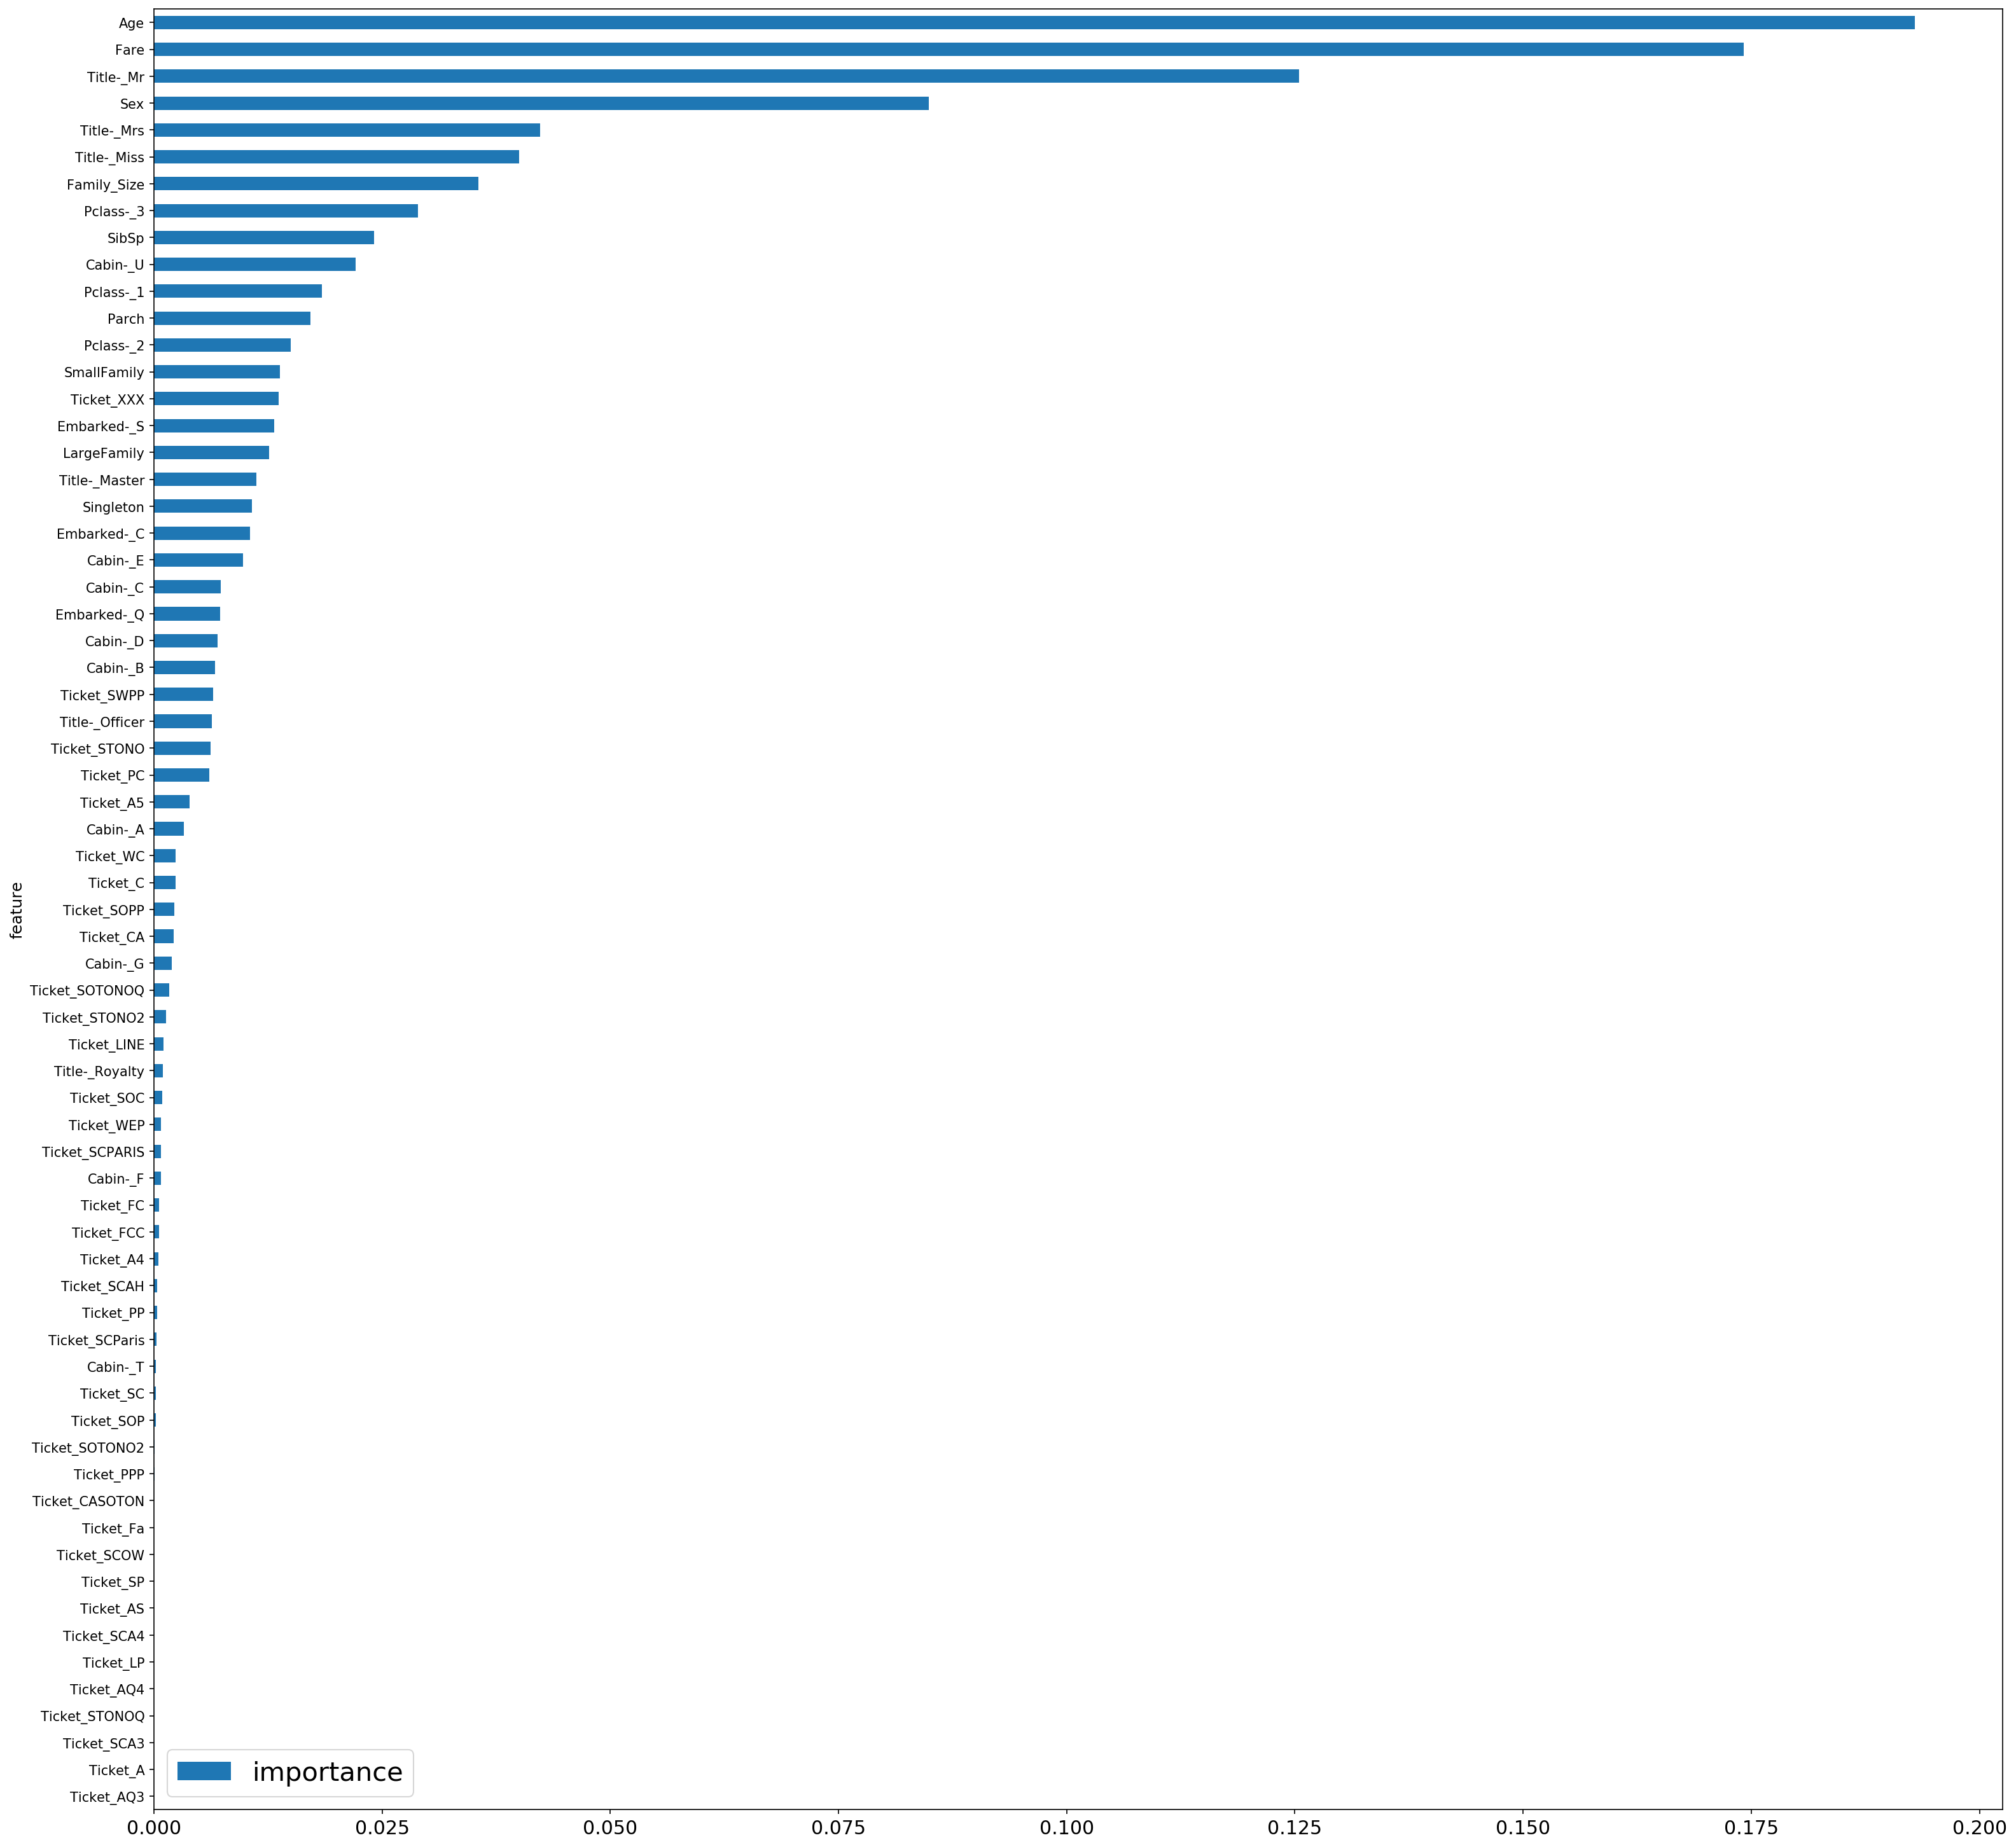

In [40]:
features = pd.DataFrame()
features["feature"] = train.columns
features["importance"] = clf.feature_importances_
features.sort_values(by = ["importance"] , ascending = True , inplace = True)
features.set_index("feature" , inplace = True)

features.plot(kind = "barh" , figsize = (25,25))

In [41]:
model = SelectFromModel(clf , prefit=True)
train_new = model.transform(train)

test_new = model.transform(test)
print(train_new.shape , test_new.shape)

(891, 13) (418, 13)


In [44]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg , logreg_cv , rf , gboost]

for model in models:
    print("Cross-Validation of : {}".format(model.__class__))
    score = compute_score(clf = model , X = train_new , y = target , scoring="accuracy")
    print("CV score = {}".format(score))
    print("------")

Cross-Validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.817048521750047
------
Cross-Validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
CV score = 0.8170547988199107
------
Cross-Validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.8159437574540205
------
Cross-Validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.8361308141359615
------


In [48]:
run_gs = True

if run_gs:
    para_grid = {
        "max_depth" : [4,6,8],
        "n_estimators" : [50 , 10],
        "max_features" : ["sqrt" , "log2"],
        "min_samples_split" : [2,3,10],
        "min_samples_leaf" : [1,3,10],
        "bootstrap" : [True , False]
        }
    
    forest = RandomForestClassifier(n_jobs=-1)
    cross_validation = StratifiedKFold(n_splits = 5)
    
    grid_search = GridSearchCV(forest , scoring="accuracy" , param_grid=para_grid , cv=cross_validation , verbose=1 , n_jobs=-1)
    grid_search.fit(train_new , target)
    
    model = grid_search
    para = grid_search.best_params_
    
    print("Best Score :{}".format(grid_search.best_score_))
    print("Best Para : ()".format(grid_search.best_params_))

else:
    para = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   28.2s


Best Score :0.8361370912058252
Best Para : ()


[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:   37.0s finished


In [49]:
para

{'bootstrap': False,
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 50}

In [55]:
output = model.predict(test_new)
df_out = pd.DataFrame()
aux = pd.read_csv("./Datasets/Titanic/test.csv")

In [58]:
df_out['PassengerId'] = aux['PassengerId']
df_out['Survived'] = output
df_out[['PassengerId','Survived']].to_csv('result2.csv', index=False)